# <label style="color:blue;">Customer Churn Prediction</label>


- Customer churn is when customers of a business leave the business over a period of time or within a certain period of time. Predicting customer churn is very important for a business because customer loyalty and retention is a critical factor for the success of the business.
Customer churn prediction is usually done using data analytics and machine learning techniques. In this process, past customer data and behaviour are examined to predict the likelihood of customers leaving the business.


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2020/05/Churn-Prediction-scaled.jpg" alt="Manzara" width="800" height="500">





**About Dataset** 

<table style="width:100%">
  <tr>
    <th>Columns</th>
    <th>Description</th>
    <th>Values</th>
  </tr>

  <tr>
    <td>gender</td>
    <td>Whether the customer is a male or a female</td>
    <td>0:Female,1:Male</td>

  </tr>

  <tr>
    <td>SeniorCitizen</td>
    <td>Whether the customer is a senior citizen or not</td>
    <td>0:No,1:Yes</td>

  </tr>

  <tr>
    <td>Partner</td>
    <td>Whether the customer has a partner or not</td>
    <td>0:No,1:Yes</td>

  </tr>

  <tr>
    <td>Dependents</td>
    <td>Whether the customer has dependents or not</td>
    <td>0:No,1:Yes</td>

  </tr>

  <tr>
    <td>tenure</td>
    <td>Number of months the customer has stayed with the company</td>
    <td>int</td>

  </tr>

  <tr>
    <td>PhoneService</td>
    <td>Whether the customer has a phone service or not</td>
    <td>0:No,1:Yes</td>

  </tr>

  <tr>
    <td>MultipleLines</td>
    <td>Whether the customer has multiple lines or not</td>
    <td>0:No,1:Yes,2:No Phone Service</td>

  </tr>

  <tr>
    <td>InternetService</td>
    <td>Customer’s internet service provider</td>
    <td>0:DSL,1:Fiber Optic,2:No</td>

  </tr>

  <tr>
    <td>OnlineSecurity</td>
    <td>Whether the customer has online security or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>OnlineBackup</td>
    <td>Whether the customer has online backup or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>DeviceProtection</td>
    <td>Whether the customer has device protection or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>TechSupport</td>
    <td>Whether the customer has tech support or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>StreamingTV</td>
    <td>Whether the customer has streaming TV or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>StreamingMovies</td>
    <td>Whether the customer has streaming movies or not</td>
    <td>0:No,1:No Internet Service,2:Yes</td>

  </tr>

  <tr>
    <td>Contract</td>
    <td>The contract term of the customer</td>
    <td>0:Month-to-Month,1:One Year,2:Two Year</td>

  </tr>

  <tr>
    <td>PaperlessBilling</td>
    <td>Whether the customer has paperless billing or not</td>
    <td>0:No,1:Yes</td>

  </tr>

  <tr>
    <td>PaymentMethod</td>
    <td>The customer’s payment method</td>
    <td> 0:Bank Transfer,1:Credit Card,2:Electronic Check,3:Mailed Check</td>

  </tr>

  <tr>
    <td>MonthlyCharges</td>
    <td>The amount charged to the customer monthly</td>
    <td>int</td>

  </tr>

  <tr>
    <td>TotalCharges</td>
    <td>The total amount charged to the customer</td>
    <td>int</td>

  </tr>

  <tr>
    <td>Churn</td>
    <td>Whether the customer churned or not</td>
    <td>0:No,1:Yes</td>
  </tr>
</table>


# Library Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
#from pycaret.classification import *
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,ConfusionMatrixDisplay,classification_report,roc_curve,auc,precision_score, recall_score
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler
from sklearn.model_selection import train_test_split

import optuna
import optuna.integration.lightgbm as lgb
from optuna.integration import LightGBMPruningCallback
from optuna.samplers import TPESampler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Embedding, LSTM, Dense,Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning) 


from IPython.display import HTML




%matplotlib inline

# Data Import and EDA

In [2]:
df=pd.read_csv("data/Merge_Data.csv")

In [3]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,No phone service,DSL,No,Yes,No,No,No,No,1,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,No,DSL,Yes,No,Yes,No,No,No,34,Yes,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,No,DSL,Yes,Yes,No,No,No,No,2,Yes,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,45,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,No,Fiber optic,No,No,No,No,No,No,2,Yes,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
tenure              0
PhoneService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7042 entries, 0 to 7041
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7042 non-null   object 
 1   SeniorCitizen     7042 non-null   int64  
 2   Partner           7042 non-null   object 
 3   Dependents        7042 non-null   object 
 4   MultipleLines     7042 non-null   object 
 5   InternetService   7042 non-null   object 
 6   OnlineSecurity    7042 non-null   object 
 7   OnlineBackup      7042 non-null   object 
 8   DeviceProtection  7042 non-null   object 
 9   TechSupport       7042 non-null   object 
 10  StreamingTV       7042 non-null   object 
 11  StreamingMovies   7042 non-null   object 
 12  tenure            7042 non-null   int64  
 13  PhoneService      7042 non-null   object 
 14  Contract          7042 non-null   object 
 15  PaperlessBilling  7042 non-null   object 
 16  PaymentMethod     7042 non-null   object 


In [6]:
df.shape

(7042, 20)

In [7]:
df.select_dtypes(include=['object']).columns

Index(['gender', 'Partner', 'Dependents', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PhoneService', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df["SeniorCitizen"].value_counts()

0    5900
1    1142
Name: SeniorCitizen, dtype: int64

In [9]:
df["Partner"].value_counts()


No     3640
Yes    3402
Name: Partner, dtype: int64

In [10]:
df["Dependents"].value_counts()

No     4932
Yes    2110
Name: Dependents, dtype: int64

In [11]:
df["PhoneService"].value_counts()

Yes    6360
No      682
Name: PhoneService, dtype: int64

In [12]:
df["MultipleLines"].value_counts()

No                  3389
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [13]:
df["InternetService"].value_counts()

Fiber optic    3095
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [14]:
df["OnlineSecurity"].value_counts()

No                     3498
Yes                    2018
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [15]:
df["OnlineBackup"].value_counts()

No                     3087
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [16]:
df["DeviceProtection"].value_counts()

No                     3095
Yes                    2421
No internet service    1526
Name: DeviceProtection, dtype: int64

In [17]:
df["TechSupport"].value_counts()

No                     3473
Yes                    2043
No internet service    1526
Name: TechSupport, dtype: int64

In [18]:
df["StreamingTV"].value_counts()

No                     2810
Yes                    2706
No internet service    1526
Name: StreamingTV, dtype: int64

In [19]:
df["StreamingMovies"].value_counts()

No                     2785
Yes                    2731
No internet service    1526
Name: StreamingMovies, dtype: int64

In [20]:
df["Contract"].value_counts()

Month-to-month    3875
Two year          1694
One year          1473
Name: Contract, dtype: int64

In [21]:
df["PaperlessBilling"].value_counts()

Yes    4170
No     2872
Name: PaperlessBilling, dtype: int64

In [22]:
df["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1543
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [23]:
df["TotalCharges"]=df["TotalCharges"].replace(" ",0) # boş verileri 0 ile değiştirdik.
df["TotalCharges"]=df["TotalCharges"].astype(float) # veri tipini object'ten float'a değiştirdik.


In [24]:
df["Churn"].value_counts()
#Verimiz unbalanced olduğu için oversampling ile veri dağılımını eşitleyeceğiz.

No     5173
Yes    1869
Name: Churn, dtype: int64

In [25]:
# CSV dosyasını oku
df = pd.read_csv('data/Merge_Data.csv')

# Dönüşüm yapılmayacak sütunlar
excluded_columns = ['tenure', 'MonthlyCharges', 'TotalCharges', 'PaymentMethod']

# PaymentMethod kolonunu etiketle
payment_method_encoder = LabelEncoder()
df['PaymentMethod'] = payment_method_encoder.fit_transform(df['PaymentMethod'])

# İki sınıflı sütunları bul (dönüşüm yapılmayacak sütunlar hariç)
binary_columns = [col for col in df.columns if df[col].nunique() == 2 and col not in excluded_columns]

# Kategorik sütunları sayısal değerlere dönüştür (dönüşüm yapılmayacak sütunlar hariç)
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    if column not in excluded_columns:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# İki sınıflı sütunlar ve dönüşüm yapılmayacak sütunlar haricindeki sütunları belirle
non_binary_columns = [col for col in df.columns if col not in binary_columns and col not in excluded_columns]

# İki sınıflı sütunları 0 ve 1 olarak bırak, diğerlerini ölçeklendir
scaler = MinMaxScaler()
df[non_binary_columns] = scaler.fit_transform(df[non_binary_columns])

# İki sınıflı sütunlar dışında kalan sütunları 0, 1, 2 gibi değerlere yuvarlayın
df[non_binary_columns] = df[non_binary_columns].apply(lambda x: (x * 2).astype(int))

df["TotalCharges"]=df["TotalCharges"].replace(" ",0) # boş verileri 0 ile değiştirdik.
df["TotalCharges"]=df["TotalCharges"].astype(float) # veri tipini object'ten float'a değiştirdik.
df

,gender,SeniorCitizen,Partner,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,tenure,PhoneService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,2,0,0,0,0,1,0,0,1,2,29.85,29.85,0
1,1,0,0,0,0,0,2,0,2,0,0,0,34,1,1,0,3,56.95,1889.50,0
2,1,0,0,0,0,0,2,2,0,0,0,0,2,1,0,1,3,53.85,108.15,1
3,1,0,0,0,1,0,2,0,2,2,0,0,45,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,0,1,0,0,0,0,0,0,2,1,0,1,2,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,0,0,0,0,0,2,1,1,1,1,1,1,72,1,2,1,0,21.15,1419.40,0
7038,1,0,1,1,2,0,2,0,2,2,2,2,24,1,1,1,3,84.80,1990.50,0
7039,0,0,1,1,2,1,0,2,2,0,2,2,72,1,1,1,1,103.20,7362.90,0
7040,0,0,1,1,1,0,2,0,0,0,0,0,11,0,0,1,2,29.60,346.45,0


- After normalising the values in our data set and applying the necessary transformations, our data became suitable for the EDA process.

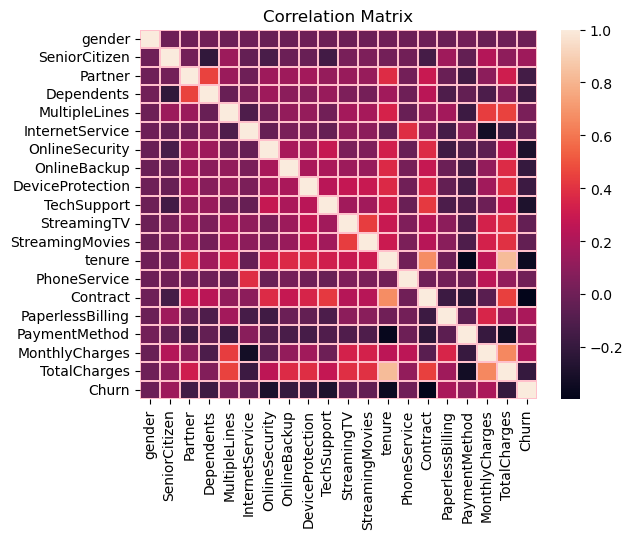

In [26]:
sns.heatmap(df.corr(),fmt=".2g",linewidths=0.1,linecolor="pink");
plt.title("Correlation Matrix")
plt.show()


In [27]:
churn_counts = df["Churn"].value_counts()

# Bar grafiği oluşturma
fig = px.bar(
    x=churn_counts.index,
    y=churn_counts.values,
    labels={'x': 'Seperation Status', 'y': 'Number of Customers'},
    title='Customer Churn Rate',
    color_discrete_sequence=['orange']
)

# Grafiği gösterme
fig.show()
# Imbalanced bir datayla çalışıyoruz. Bu datayla çalışmak için önce undersampling(veri azaltma) 
# veya oversampling(veri çoğaltma) yapmamız gerek.

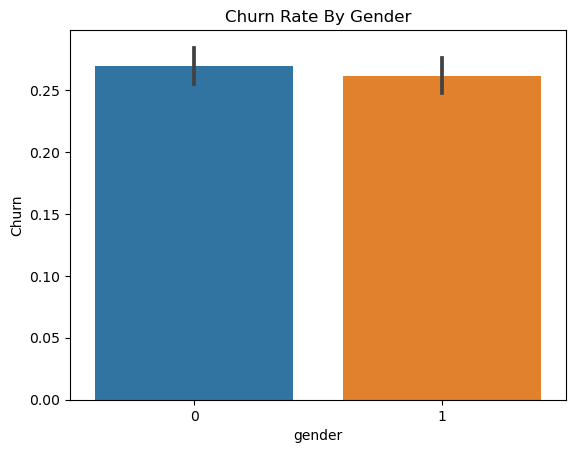

In [28]:
sns.barplot(y=df["Churn"],x=df["gender"])
plt.title("Churn Rate By Gender")
plt.show()


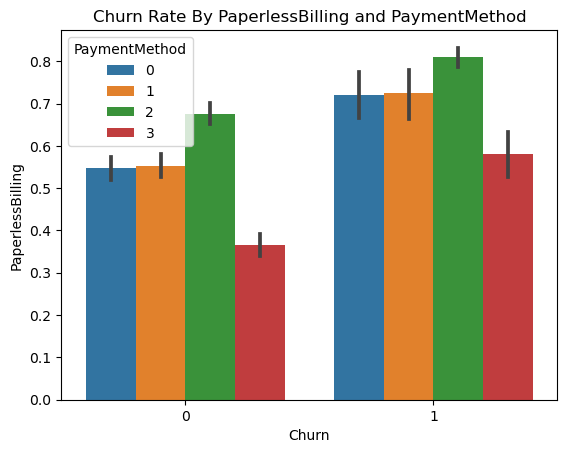

In [29]:
sns.barplot(x=df["Churn"],y=df["PaperlessBilling"],hue=df["PaymentMethod"])
plt.title("Churn Rate By PaperlessBilling and PaymentMethod")
plt.show()

In [30]:
# Yaşlı vatandaşların yüzdesini hesaplama
senior_citizen_percentage = df['SeniorCitizen'].value_counts(normalize=True) * 100

# Pie chart oluşturma
fig = px.pie(
    names=['No', 'Yes'],
    values=senior_citizen_percentage.values,
    labels={'No': 'No', 'Yes': 'Yes'},
    title='% of Senior Citizens',
)

# Grafiği gösterme
fig.show()

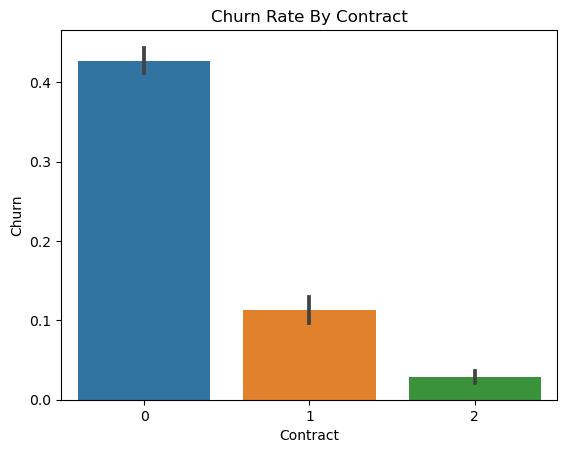

In [31]:
sns.barplot(y=df["Churn"],x=df["Contract"])
plt.title("Churn Rate By Contract")
plt.show()

In [32]:
labels = df['PaymentMethod'].unique()
values = df['PaymentMethod'].value_counts()

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3)])
fig.update_layout(title_text="<b>Payment Method Distribution</b>")
fig.show()

In [33]:
fig = px.histogram(df, x="Churn", color="PaymentMethod", title="<b>Customer Payment Method distribution w.r.t. Churn</b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

## Data Oversampling With SMOTE

- Since our data set is unbalanced, it will give biased results. Therefore, in order to prevent these biased results, we will apply the data oversampling technique `SMOTE` to our data set.

In [34]:
X=df.drop(["Churn"],axis=1)
y=df["Churn"]


In [35]:
from imblearn.over_sampling import SMOTE

# SMOTE uygulama
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Oversampling sonrası sınıf sayılarını ve veri boyutunu gösterme
print("Sınıf sayıları oversampling öncesi:", dict(zip(*np.unique(y, return_counts=True))))
print("Sınıf sayıları oversampling sonrası:", dict(zip(*np.unique(y_resampled, return_counts=True))))
print("Oversampling sonrası veri boyutu:", X_resampled.shape, y_resampled.shape)

X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

Sınıf sayıları oversampling öncesi: {0: 5173, 1: 1869}
Sınıf sayıları oversampling sonrası: {0: 5173, 1: 5173}
Oversampling sonrası veri boyutu: (10346, 19) (10346,)


## Model Performance Test Manually

- First we will get the first results by manually entering the models ourselves.

In [36]:
X=df.drop(["Churn"],axis=1)
y=df["Churn"]

In [37]:
robust=RobustScaler()
minMax=MinMaxScaler()
standard=StandardScaler()

robustScale=robust.fit_transform(df)
minmaxScale=minMax.fit_transform(df)
standardScale=standard.fit_transform(df)

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (8276, 19)
X_test: (2070, 19)
y_train: (8276,)
y_test: (2070,)


In [39]:
models = [LogisticRegression(),
          KNeighborsClassifier(),
          DecisionTreeClassifier(),
          RandomForestClassifier(),
          GradientBoostingClassifier(),
          LGBMClassifier(),
          XGBClassifier(),
          CatBoostClassifier(verbose=False),
          RidgeClassifier()]



modelNames = ["LR", "KNN", "CART", "RF", "GB", "LightGBM", "XGB", "CatBoost", "Ridge"]
scores = []

for model in models:
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    skor = f1_score(y_test, yhat)
    scores.append(skor)

data = {'Model': modelNames, 'F1 Score': scores}
df = pd.DataFrame(data)

fig = px.bar(df, x='Model', y='F1 Score', text='F1 Score', labels={'F1 Score': 'F1 Score'},
             title='Model Performances', color='Model')

fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')

fig.update_layout(xaxis_title='Model', yaxis_title='F1 Score', yaxis_range=[0, 1])

fig.show()




## Model Selection With LazyPredict 

- The `LazyPredict` library is a library that will apply a first training for us to our cleaned and normalised dataset with many models it contains and share the results with us in a table.

In [40]:
!pip3 install -U lazypredict

In [41]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

In [42]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None,classifiers = 'all')
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 29/29 [00:24<00:00,  1.17it/s]


In [43]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.86,0.86,0.86,0.86,0.88
XGBClassifier,0.85,0.85,0.85,0.85,0.59
LGBMClassifier,0.85,0.85,0.85,0.85,0.23
ExtraTreesClassifier,0.84,0.84,0.84,0.84,0.86
BaggingClassifier,0.84,0.84,0.84,0.84,0.29
AdaBoostClassifier,0.84,0.84,0.84,0.84,0.41
SVC,0.83,0.83,0.83,0.83,3.23
LinearSVC,0.82,0.82,0.82,0.82,0.65
CalibratedClassifierCV,0.82,0.82,0.82,0.82,2.44


In [44]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
RandomForestClassifier,0.86,0.86,0.86,0.86,0.88
XGBClassifier,0.85,0.85,0.85,0.85,0.59
LGBMClassifier,0.85,0.85,0.85,0.85,0.23
ExtraTreesClassifier,0.84,0.84,0.84,0.84,0.86
BaggingClassifier,0.84,0.84,0.84,0.84,0.29
AdaBoostClassifier,0.84,0.84,0.84,0.84,0.41
SVC,0.83,0.83,0.83,0.83,3.23
LinearSVC,0.82,0.82,0.82,0.82,0.65
CalibratedClassifierCV,0.82,0.82,0.82,0.82,2.44




- As can be seen in the results table above, `RandomForest`, `XGBoost` and `LGBM` models got almost the same results. However, the `LGBM` model ran in 0.22 seconds and was the most successful model in terms of speed and evaluation metric. Therefore, we will continue with the `LGBM` model in the next steps.





In [45]:
model_dictionary = clf.provide_models(X_train,X_test,y_train,y_test)

In [46]:
model_dictionary

{'AdaBoostClassifier': Pipeline(steps=[('preprocessor',
                  ColumnTransformer(transformers=[('numeric',
                                                   Pipeline(steps=[('imputer',
                                                                    SimpleImputer()),
                                                                   ('scaler',
                                                                    StandardScaler())]),
                                                   Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure',
        'Phone...
                                                                    SimpleImputer(fill_value='missing',
                                                                                  strategy='constant')),
                                                

## Model Tuning with Optuna

- Now we will select the best parameters of our `LGBM` model with the `Optuna` library.

In [47]:
# Optuna ile hiperparametre optimizasyonu yapacak işlev
def objective(trial):
    params = {
        "objective": "binary",
        "metric": "binary_error",
        "verbosity": -1,
        "boosting_type": "gbdt",
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 15.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 15.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 512),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.01, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.01, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 0, 15),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 100),
        #"seed":42
    }
    
    # LightGBM modelini oluştur
    model =LGBMClassifier(**params).fit(X_train, y_train)

    # Modeli test verisi üzerinde değerlendir (F1 skoru kullanılıyor)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    return f1





In [48]:
# Optuna'dan optimize edilmiş hiperparametreleri al
study = optuna.create_study(direction="maximize")  # Yönü "maximize" olarak ayarlayın
study.optimize(objective, n_trials=100)
# En iyi hiperparametreleri ve en iyi F1 skoru görüntüle
best_params = study.best_params
best_score = study.best_value
print("En iyi hiperparametreler:", best_params)
print("En iyi F1 skoru:", best_score)


[I 2024-06-10 14:38:44,053] A new study created in memory with name: no-name-6eb657af-7718-4b99-acec-5bac17a0bee2


[LightGBM] [Warning] feature_fraction is set=0.41484361538217307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.41484361538217307
[LightGBM] [Warning] lambda_l1 is set=0.006125802133539846, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006125802133539846
[LightGBM] [Warning] bagging_fraction is set=0.5470138416617322, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5470138416617322
[LightGBM] [Warning] lambda_l2 is set=9.512533316875005e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.512533316875005e-08
[LightGBM] [Warning] bagging_freq is set=14, subsample_freq=0 will be ignored. Current value: bagging_freq=14


[I 2024-06-10 14:38:44,448] Trial 0 finished with value: 0.8506184586108467 and parameters: {'lambda_l1': 0.006125802133539846, 'lambda_l2': 9.512533316875005e-08, 'num_leaves': 338, 'feature_fraction': 0.41484361538217307, 'bagging_fraction': 0.5470138416617322, 'bagging_freq': 14, 'min_child_samples': 73}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.19508160227258456, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.19508160227258456
[LightGBM] [Warning] lambda_l1 is set=0.4057890460639463, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.4057890460639463
[LightGBM] [Warning] bagging_fraction is set=0.7455472693991542, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7455472693991542
[LightGBM] [Warning] lambda_l2 is set=0.00963862674873262, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00963862674873262
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11


[I 2024-06-10 14:38:44,682] Trial 1 finished with value: 0.8438978240302744 and parameters: {'lambda_l1': 0.4057890460639463, 'lambda_l2': 0.00963862674873262, 'num_leaves': 360, 'feature_fraction': 0.19508160227258456, 'bagging_fraction': 0.7455472693991542, 'bagging_freq': 11, 'min_child_samples': 100}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.2392865092773648, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2392865092773648
[LightGBM] [Warning] lambda_l1 is set=3.000966450784861e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.000966450784861e-07
[LightGBM] [Warning] bagging_fraction is set=0.45178339823277286, subsample=1.0 will be ignored. Current value: bagging_fraction=0.45178339823277286
[LightGBM] [Warning] lambda_l2 is set=1.9988771473177245e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9988771473177245e-08
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2024-06-10 14:38:45,178] Trial 2 finished with value: 0.8438978240302744 and parameters: {'lambda_l1': 3.000966450784861e-07, 'lambda_l2': 1.9988771473177245e-08, 'num_leaves': 511, 'feature_fraction': 0.2392865092773648, 'bagging_fraction': 0.45178339823277286, 'bagging_freq': 8, 'min_child_samples': 34}. Best is trial 0 with value: 0.8506184586108467.
[I 2024-06-10 14:38:45,236] Trial 3 finished with value: 0.0 and parameters: {'lambda_l1': 0.0006075410458149191, 'lambda_l2': 0.00021718488183169015, 'num_leaves': 174, 'feature_fraction': 0.5211806557742765, 'bagging_fraction': 0.011655978025113527, 'bagging_freq': 10, 'min_child_samples': 85}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.5211806557742765, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5211806557742765
[LightGBM] [Warning] lambda_l1 is set=0.0006075410458149191, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006075410458149191
[LightGBM] [Warning] bagging_fraction is set=0.011655978025113527, subsample=1.0 will be ignored. Current value: bagging_fraction=0.011655978025113527
[LightGBM] [Warning] lambda_l2 is set=0.00021718488183169015, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.00021718488183169015
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] feature_fraction is set=0.36938103688619056, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.36938103688619056
[LightGBM] [Warning] lambda_l1 is set=6.019332314411574e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.019332314411574e-06
[LightGBM

[I 2024-06-10 14:38:45,670] Trial 4 finished with value: 0.8312412831241284 and parameters: {'lambda_l1': 6.019332314411574e-06, 'lambda_l2': 1.2403591195101664, 'num_leaves': 229, 'feature_fraction': 0.36938103688619056, 'bagging_fraction': 0.06229055810936164, 'bagging_freq': 9, 'min_child_samples': 1}. Best is trial 0 with value: 0.8506184586108467.
[I 2024-06-10 14:38:45,737] Trial 5 finished with value: 0.8039399624765479 and parameters: {'lambda_l1': 5.7432678419745727e-08, 'lambda_l2': 0.006344486469888204, 'num_leaves': 278, 'feature_fraction': 0.10355025917902307, 'bagging_fraction': 0.012592740456193595, 'bagging_freq': 11, 'min_child_samples': 17}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.10355025917902307, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.10355025917902307
[LightGBM] [Warning] lambda_l1 is set=5.7432678419745727e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.7432678419745727e-08
[LightGBM] [Warning] bagging_fraction is set=0.012592740456193595, subsample=1.0 will be ignored. Current value: bagging_fraction=0.012592740456193595
[LightGBM] [Warning] lambda_l2 is set=0.006344486469888204, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.006344486469888204
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11
[LightGBM] [Warning] feature_fraction is set=0.30593614470423564, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.30593614470423564
[LightGBM] [Warning] lambda_l1 is set=0.16904489199743344, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.16904489199743344
[LightGBM] [W

[I 2024-06-10 14:38:46,005] Trial 6 finished with value: 0.838526912181303 and parameters: {'lambda_l1': 0.16904489199743344, 'lambda_l2': 1.0499007363792137e-08, 'num_leaves': 424, 'feature_fraction': 0.30593614470423564, 'bagging_fraction': 0.30555219224546365, 'bagging_freq': 9, 'min_child_samples': 33}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.387192662869675, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.387192662869675
[LightGBM] [Warning] lambda_l1 is set=2.334797208324078e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.334797208324078e-05
[LightGBM] [Warning] bagging_fraction is set=0.21622293068103896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.21622293068103896
[LightGBM] [Warning] lambda_l2 is set=0.37067294446997684, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.37067294446997684
[LightGBM] [Warning] bagging_freq is set=13, subsample_freq=0 will be ignored. Current value: bagging_freq=13


[I 2024-06-10 14:38:46,255] Trial 7 finished with value: 0.843441466854725 and parameters: {'lambda_l1': 2.334797208324078e-05, 'lambda_l2': 0.37067294446997684, 'num_leaves': 24, 'feature_fraction': 0.387192662869675, 'bagging_fraction': 0.21622293068103896, 'bagging_freq': 13, 'min_child_samples': 1}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.6132249518151378, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6132249518151378
[LightGBM] [Warning] lambda_l1 is set=12.062470117995064, reg_alpha=0.0 will be ignored. Current value: lambda_l1=12.062470117995064
[LightGBM] [Warning] bagging_fraction is set=0.39517690889064655, subsample=1.0 will be ignored. Current value: bagging_fraction=0.39517690889064655
[LightGBM] [Warning] lambda_l2 is set=0.004670333389053438, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.004670333389053438
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2024-06-10 14:38:46,469] Trial 8 finished with value: 0.8289224952741021 and parameters: {'lambda_l1': 12.062470117995064, 'lambda_l2': 0.004670333389053438, 'num_leaves': 110, 'feature_fraction': 0.6132249518151378, 'bagging_fraction': 0.39517690889064655, 'bagging_freq': 6, 'min_child_samples': 3}. Best is trial 0 with value: 0.8506184586108467.
[I 2024-06-10 14:38:46,645] Trial 9 finished with value: 0.8459357277882797 and parameters: {'lambda_l1': 0.05963908235214435, 'lambda_l2': 2.0035888384399493e-07, 'num_leaves': 77, 'feature_fraction': 0.2298005762096395, 'bagging_fraction': 0.5997510609218372, 'bagging_freq': 13, 'min_child_samples': 99}. Best is trial 0 with value: 0.8506184586108467.


[LightGBM] [Warning] feature_fraction is set=0.2298005762096395, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2298005762096395
[LightGBM] [Warning] lambda_l1 is set=0.05963908235214435, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05963908235214435
[LightGBM] [Warning] bagging_fraction is set=0.5997510609218372, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5997510609218372
[LightGBM] [Warning] lambda_l2 is set=2.0035888384399493e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0035888384399493e-07
[LightGBM] [Warning] bagging_freq is set=13, subsample_freq=0 will be ignored. Current value: bagging_freq=13
[LightGBM] [Warning] feature_fraction is set=0.8395509147855019, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8395509147855019
[LightGBM] [Warning] lambda_l1 is set=0.0016196394792074608, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0016196394792074608
[LightGBM] [Warning

[I 2024-06-10 14:38:47,201] Trial 10 finished with value: 0.851145038167939 and parameters: {'lambda_l1': 0.0016196394792074608, 'lambda_l2': 2.8076512881250053e-06, 'num_leaves': 352, 'feature_fraction': 0.8395509147855019, 'bagging_fraction': 0.9278837676362446, 'bagging_freq': 1, 'min_child_samples': 69}. Best is trial 10 with value: 0.851145038167939.


[LightGBM] [Warning] feature_fraction is set=0.862061347587636, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.862061347587636
[LightGBM] [Warning] lambda_l1 is set=0.003409516085450915, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003409516085450915
[LightGBM] [Warning] bagging_fraction is set=0.9858276167678091, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9858276167678091
[LightGBM] [Warning] lambda_l2 is set=2.318500075940529e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.318500075940529e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:38:47,730] Trial 11 finished with value: 0.8527724665391969 and parameters: {'lambda_l1': 0.003409516085450915, 'lambda_l2': 2.318500075940529e-06, 'num_leaves': 336, 'feature_fraction': 0.862061347587636, 'bagging_fraction': 0.9858276167678091, 'bagging_freq': 0, 'min_child_samples': 69}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.8593581308233108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8593581308233108
[LightGBM] [Warning] lambda_l1 is set=0.0006288441800277454, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006288441800277454
[LightGBM] [Warning] bagging_fraction is set=0.9901347472006845, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9901347472006845
[LightGBM] [Warning] lambda_l2 is set=5.856795661957134e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.856795661957134e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:38:48,300] Trial 12 finished with value: 0.8476190476190476 and parameters: {'lambda_l1': 0.0006288441800277454, 'lambda_l2': 5.856795661957134e-06, 'num_leaves': 431, 'feature_fraction': 0.8593581308233108, 'bagging_fraction': 0.9901347472006845, 'bagging_freq': 0, 'min_child_samples': 57}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.9893170505440022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9893170505440022
[LightGBM] [Warning] lambda_l1 is set=0.004637892884750035, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.004637892884750035
[LightGBM] [Warning] bagging_fraction is set=0.9803443437372779, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9803443437372779
[LightGBM] [Warning] lambda_l2 is set=3.3906197671246545e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.3906197671246545e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:38:48,892] Trial 13 finished with value: 0.8454198473282443 and parameters: {'lambda_l1': 0.004637892884750035, 'lambda_l2': 3.3906197671246545e-06, 'num_leaves': 312, 'feature_fraction': 0.9893170505440022, 'bagging_fraction': 0.9803443437372779, 'bagging_freq': 0, 'min_child_samples': 64}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.7384705082227226, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7384705082227226
[LightGBM] [Warning] lambda_l1 is set=3.573358240454254e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.573358240454254e-05
[LightGBM] [Warning] bagging_fraction is set=0.8014008986812358, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8014008986812358
[LightGBM] [Warning] lambda_l2 is set=5.664498153433698e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.664498153433698e-06
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:38:49,434] Trial 14 finished with value: 0.8494318181818181 and parameters: {'lambda_l1': 3.573358240454254e-05, 'lambda_l2': 5.664498153433698e-06, 'num_leaves': 395, 'feature_fraction': 0.7384705082227226, 'bagging_fraction': 0.8014008986812358, 'bagging_freq': 3, 'min_child_samples': 76}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.7794058870102178, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7794058870102178
[LightGBM] [Warning] lambda_l1 is set=0.006099297448033287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.006099297448033287
[LightGBM] [Warning] bagging_fraction is set=0.8606976934523123, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8606976934523123
[LightGBM] [Warning] lambda_l2 is set=4.225825276350439e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.225825276350439e-05
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:38:50,108] Trial 15 finished with value: 0.8457854406130269 and parameters: {'lambda_l1': 0.006099297448033287, 'lambda_l2': 4.225825276350439e-05, 'num_leaves': 222, 'feature_fraction': 0.7794058870102178, 'bagging_fraction': 0.8606976934523123, 'bagging_freq': 2, 'min_child_samples': 44}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.9743318089996728, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9743318089996728
[LightGBM] [Warning] lambda_l1 is set=0.0001509483502114502, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001509483502114502
[LightGBM] [Warning] bagging_fraction is set=0.6691662663103427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6691662663103427
[LightGBM] [Warning] lambda_l2 is set=6.730801955418352e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.730801955418352e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-06-10 14:38:50,670] Trial 16 finished with value: 0.8477640342530923 and parameters: {'lambda_l1': 0.0001509483502114502, 'lambda_l2': 6.730801955418352e-07, 'num_leaves': 502, 'feature_fraction': 0.9743318089996728, 'bagging_fraction': 0.6691662663103427, 'bagging_freq': 5, 'min_child_samples': 51}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.6553680619011965, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6553680619011965
[LightGBM] [Warning] lambda_l1 is set=1.3426144967800243e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3426144967800243e-06
[LightGBM] [Warning] bagging_fraction is set=0.891797925037611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.891797925037611
[LightGBM] [Warning] lambda_l2 is set=0.0001031978673118523, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.0001031978673118523
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:38:51,091] Trial 17 finished with value: 0.8506961113778204 and parameters: {'lambda_l1': 1.3426144967800243e-06, 'lambda_l2': 0.0001031978673118523, 'num_leaves': 288, 'feature_fraction': 0.6553680619011965, 'bagging_fraction': 0.891797925037611, 'bagging_freq': 3, 'min_child_samples': 87}. Best is trial 11 with value: 0.8527724665391969.


[LightGBM] [Warning] feature_fraction is set=0.8831354685459993, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8831354685459993
[LightGBM] [Warning] lambda_l1 is set=1.3567084649318208e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.3567084649318208e-08
[LightGBM] [Warning] bagging_fraction is set=0.7309117723280373, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7309117723280373
[LightGBM] [Warning] lambda_l2 is set=9.671410688618108e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.671410688618108e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:38:51,539] Trial 18 finished with value: 0.8545454545454546 and parameters: {'lambda_l1': 1.3567084649318208e-08, 'lambda_l2': 9.671410688618108e-07, 'num_leaves': 381, 'feature_fraction': 0.8831354685459993, 'bagging_fraction': 0.7309117723280373, 'bagging_freq': 2, 'min_child_samples': 66}. Best is trial 18 with value: 0.8545454545454546.


[LightGBM] [Warning] feature_fraction is set=0.8946687246734986, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8946687246734986
[LightGBM] [Warning] lambda_l1 is set=1.1600516030946852e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1600516030946852e-08
[LightGBM] [Warning] bagging_fraction is set=0.7597070618640952, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7597070618640952
[LightGBM] [Warning] lambda_l2 is set=3.163756781102288e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.163756781102288e-07
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-06-10 14:38:52,061] Trial 19 finished with value: 0.8508813720819438 and parameters: {'lambda_l1': 1.1600516030946852e-08, 'lambda_l2': 3.163756781102288e-07, 'num_leaves': 444, 'feature_fraction': 0.8946687246734986, 'bagging_fraction': 0.7597070618640952, 'bagging_freq': 5, 'min_child_samples': 59}. Best is trial 18 with value: 0.8545454545454546.


[LightGBM] [Warning] feature_fraction is set=0.7197834818665022, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7197834818665022
[LightGBM] [Warning] lambda_l1 is set=1.1003219177331475e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1003219177331475e-06
[LightGBM] [Warning] bagging_fraction is set=0.6664972674703353, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6664972674703353
[LightGBM] [Warning] lambda_l2 is set=2.7059724098131674e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.7059724098131674e-05
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-06-10 14:38:52,792] Trial 20 finished with value: 0.849119466920514 and parameters: {'lambda_l1': 1.1003219177331475e-06, 'lambda_l2': 2.7059724098131674e-05, 'num_leaves': 179, 'feature_fraction': 0.7197834818665022, 'bagging_fraction': 0.6664972674703353, 'bagging_freq': 4, 'min_child_samples': 43}. Best is trial 18 with value: 0.8545454545454546.


[LightGBM] [Warning] feature_fraction is set=0.8510812604363038, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8510812604363038
[LightGBM] [Warning] lambda_l1 is set=0.00015420346843469585, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015420346843469585
[LightGBM] [Warning] bagging_fraction is set=0.9013786322072004, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9013786322072004
[LightGBM] [Warning] lambda_l2 is set=1.206217863316361e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.206217863316361e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:38:53,207] Trial 21 finished with value: 0.8561808561808562 and parameters: {'lambda_l1': 0.00015420346843469585, 'lambda_l2': 1.206217863316361e-06, 'num_leaves': 368, 'feature_fraction': 0.8510812604363038, 'bagging_fraction': 0.9013786322072004, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 21 with value: 0.8561808561808562.


[LightGBM] [Warning] feature_fraction is set=0.8983907815453119, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8983907815453119
[LightGBM] [Warning] lambda_l1 is set=4.695035303265617e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.695035303265617e-05
[LightGBM] [Warning] bagging_fraction is set=0.8498790122193834, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8498790122193834
[LightGBM] [Warning] lambda_l2 is set=1.1989966295346292e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1989966295346292e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:38:53,597] Trial 22 finished with value: 0.8504314477468841 and parameters: {'lambda_l1': 4.695035303265617e-05, 'lambda_l2': 1.1989966295346292e-06, 'num_leaves': 402, 'feature_fraction': 0.8983907815453119, 'bagging_fraction': 0.8498790122193834, 'bagging_freq': 2, 'min_child_samples': 88}. Best is trial 21 with value: 0.8561808561808562.


[LightGBM] [Warning] feature_fraction is set=0.7947016668636673, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7947016668636673
[LightGBM] [Warning] lambda_l1 is set=1.1197576576569144e-08, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.1197576576569144e-08
[LightGBM] [Warning] bagging_fraction is set=0.8951425118248788, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8951425118248788
[LightGBM] [Warning] lambda_l2 is set=2.664041216283795e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.664041216283795e-05
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:38:54,051] Trial 23 finished with value: 0.8510028653295129 and parameters: {'lambda_l1': 1.1197576576569144e-08, 'lambda_l2': 2.664041216283795e-05, 'num_leaves': 462, 'feature_fraction': 0.7947016668636673, 'bagging_fraction': 0.8951425118248788, 'bagging_freq': 0, 'min_child_samples': 78}. Best is trial 21 with value: 0.8561808561808562.


[LightGBM] [Warning] feature_fraction is set=0.9250780735484747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9250780735484747
[LightGBM] [Warning] lambda_l1 is set=6.089744409830479e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.089744409830479e-06
[LightGBM] [Warning] bagging_fraction is set=0.9960276549077443, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9960276549077443
[LightGBM] [Warning] lambda_l2 is set=8.967175293269292e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.967175293269292e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:38:54,585] Trial 24 finished with value: 0.8492366412213741 and parameters: {'lambda_l1': 6.089744409830479e-06, 'lambda_l2': 8.967175293269292e-08, 'num_leaves': 370, 'feature_fraction': 0.9250780735484747, 'bagging_fraction': 0.9960276549077443, 'bagging_freq': 2, 'min_child_samples': 65}. Best is trial 21 with value: 0.8561808561808562.


[LightGBM] [Warning] feature_fraction is set=0.9961602662360594, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9961602662360594
[LightGBM] [Warning] lambda_l1 is set=0.00014088416261115908, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00014088416261115908
[LightGBM] [Warning] bagging_fraction is set=0.7906396918093167, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7906396918093167
[LightGBM] [Warning] lambda_l2 is set=6.635389061649055e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.635389061649055e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:38:55,154] Trial 25 finished with value: 0.8586538461538462 and parameters: {'lambda_l1': 0.00014088416261115908, 'lambda_l2': 6.635389061649055e-07, 'num_leaves': 312, 'feature_fraction': 0.9961602662360594, 'bagging_fraction': 0.7906396918093167, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9848638332562428, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9848638332562428
[LightGBM] [Warning] lambda_l1 is set=1.4199835205554673e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.4199835205554673e-07
[LightGBM] [Warning] bagging_fraction is set=0.8058283852069721, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8058283852069721
[LightGBM] [Warning] lambda_l2 is set=4.390142980673757e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.390142980673757e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-06-10 14:38:55,727] Trial 26 finished with value: 0.8504314477468841 and parameters: {'lambda_l1': 1.4199835205554673e-07, 'lambda_l2': 4.390142980673757e-07, 'num_leaves': 245, 'feature_fraction': 0.9848638332562428, 'bagging_fraction': 0.8058283852069721, 'bagging_freq': 4, 'min_child_samples': 54}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.930767773006568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.930767773006568
[LightGBM] [Warning] lambda_l1 is set=0.0002979579163829235, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002979579163829235
[LightGBM] [Warning] bagging_fraction is set=0.717388734668115, subsample=1.0 will be ignored. Current value: bagging_fraction=0.717388734668115
[LightGBM] [Warning] lambda_l2 is set=4.398888362723031e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.398888362723031e-08
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2024-06-10 14:38:56,379] Trial 27 finished with value: 0.8482527525131642 and parameters: {'lambda_l1': 0.0002979579163829235, 'lambda_l2': 4.398888362723031e-08, 'num_leaves': 308, 'feature_fraction': 0.930767773006568, 'bagging_fraction': 0.717388734668115, 'bagging_freq': 7, 'min_child_samples': 46}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8128291653888726, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8128291653888726
[LightGBM] [Warning] lambda_l1 is set=6.792059256615718e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.792059256615718e-06
[LightGBM] [Warning] bagging_fraction is set=0.811496012725611, subsample=1.0 will be ignored. Current value: bagging_fraction=0.811496012725611
[LightGBM] [Warning] lambda_l2 is set=7.034771707932696e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.034771707932696e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:38:57,497] Trial 28 finished with value: 0.858508604206501 and parameters: {'lambda_l1': 6.792059256615718e-06, 'lambda_l2': 7.034771707932696e-08, 'num_leaves': 470, 'feature_fraction': 0.8128291653888726, 'bagging_fraction': 0.811496012725611, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8056673871152008, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8056673871152008
[LightGBM] [Warning] lambda_l1 is set=0.00010924465853972157, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00010924465853972157
[LightGBM] [Warning] bagging_fraction is set=0.6364386765072141, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6364386765072141
[LightGBM] [Warning] lambda_l2 is set=6.08728222731745e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.08728222731745e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:38:58,237] Trial 29 finished with value: 0.8545627376425855 and parameters: {'lambda_l1': 0.00010924465853972157, 'lambda_l2': 6.08728222731745e-08, 'num_leaves': 473, 'feature_fraction': 0.8056673871152008, 'bagging_fraction': 0.6364386765072141, 'bagging_freq': 1, 'min_child_samples': 25}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.7013416715297521, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7013416715297521
[LightGBM] [Warning] lambda_l1 is set=1.07170235098077e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.07170235098077e-05
[LightGBM] [Warning] bagging_fraction is set=0.559938458721587, subsample=1.0 will be ignored. Current value: bagging_fraction=0.559938458721587
[LightGBM] [Warning] lambda_l2 is set=1.2801784408186385e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2801784408186385e-07
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-06-10 14:38:58,786] Trial 30 finished with value: 0.8527724665391969 and parameters: {'lambda_l1': 1.07170235098077e-05, 'lambda_l2': 1.2801784408186385e-07, 'num_leaves': 481, 'feature_fraction': 0.7013416715297521, 'bagging_fraction': 0.559938458721587, 'bagging_freq': 4, 'min_child_samples': 35}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.7928482518445872, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7928482518445872
[LightGBM] [Warning] lambda_l1 is set=0.00012010071211601678, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012010071211601678
[LightGBM] [Warning] bagging_fraction is set=0.8279537637897576, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8279537637897576
[LightGBM] [Warning] lambda_l2 is set=3.599400396871305e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.599400396871305e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:00,026] Trial 31 finished with value: 0.8506184586108467 and parameters: {'lambda_l1': 0.00012010071211601678, 'lambda_l2': 3.599400396871305e-08, 'num_leaves': 470, 'feature_fraction': 0.7928482518445872, 'bagging_fraction': 0.8279537637897576, 'bagging_freq': 1, 'min_child_samples': 19}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8064983084463319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8064983084463319
[LightGBM] [Warning] lambda_l1 is set=8.605336306457944e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.605336306457944e-05
[LightGBM] [Warning] bagging_fraction is set=0.6392621596430329, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6392621596430329
[LightGBM] [Warning] lambda_l2 is set=8.98404193331653e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.98404193331653e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:00,841] Trial 32 finished with value: 0.8526615969581749 and parameters: {'lambda_l1': 8.605336306457944e-05, 'lambda_l2': 8.98404193331653e-08, 'num_leaves': 414, 'feature_fraction': 0.8064983084463319, 'bagging_fraction': 0.6392621596430329, 'bagging_freq': 1, 'min_child_samples': 24}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9330832052039747, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9330832052039747
[LightGBM] [Warning] lambda_l1 is set=0.00029705493283272447, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00029705493283272447
[LightGBM] [Warning] bagging_fraction is set=0.7767666728912648, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7767666728912648
[LightGBM] [Warning] lambda_l2 is set=1.0787745450483091e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0787745450483091e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:01,726] Trial 33 finished with value: 0.8473282442748091 and parameters: {'lambda_l1': 0.00029705493283272447, 'lambda_l2': 1.0787745450483091e-08, 'num_leaves': 335, 'feature_fraction': 0.9330832052039747, 'bagging_fraction': 0.7767666728912648, 'bagging_freq': 3, 'min_child_samples': 27}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.5654444501204566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5654444501204566
[LightGBM] [Warning] lambda_l1 is set=0.0009604866753526607, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009604866753526607
[LightGBM] [Warning] bagging_fraction is set=0.7110190704398159, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7110190704398159
[LightGBM] [Warning] lambda_l2 is set=5.6366561235251913e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.6366561235251913e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:02,662] Trial 34 finished with value: 0.8533459895586142 and parameters: {'lambda_l1': 0.0009604866753526607, 'lambda_l2': 5.6366561235251913e-08, 'num_leaves': 495, 'feature_fraction': 0.5654444501204566, 'bagging_fraction': 0.7110190704398159, 'bagging_freq': 1, 'min_child_samples': 36}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.6722371578718798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6722371578718798
[LightGBM] [Warning] lambda_l1 is set=1.8795383999097953e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.8795383999097953e-05
[LightGBM] [Warning] bagging_fraction is set=0.5451455480677917, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5451455480677917
[LightGBM] [Warning] lambda_l2 is set=2.1774719824424015e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1774719824424015e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:03,165] Trial 35 finished with value: 0.852116024726581 and parameters: {'lambda_l1': 1.8795383999097953e-05, 'lambda_l2': 2.1774719824424015e-07, 'num_leaves': 455, 'feature_fraction': 0.6722371578718798, 'bagging_fraction': 0.5451455480677917, 'bagging_freq': 3, 'min_child_samples': 40}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.4654712737172117, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4654712737172117
[LightGBM] [Warning] lambda_l1 is set=4.019005894224555e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.019005894224555e-06
[LightGBM] [Warning] bagging_fraction is set=0.7856087329743597, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7856087329743597
[LightGBM] [Warning] lambda_l2 is set=3.2053460631647494e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.2053460631647494e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:04,520] Trial 36 finished with value: 0.8548310328415041 and parameters: {'lambda_l1': 4.019005894224555e-06, 'lambda_l2': 3.2053460631647494e-08, 'num_leaves': 512, 'feature_fraction': 0.4654712737172117, 'bagging_fraction': 0.7856087329743597, 'bagging_freq': 1, 'min_child_samples': 18}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.48212880835031774, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.48212880835031774
[LightGBM] [Warning] lambda_l1 is set=2.7876926637674383e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.7876926637674383e-06
[LightGBM] [Warning] bagging_fraction is set=0.9191468520640481, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9191468520640481
[LightGBM] [Warning] lambda_l2 is set=2.0538181676523124e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0538181676523124e-08
[LightGBM] [Warning] bagging_freq is set=6, subsample_freq=0 will be ignored. Current value: bagging_freq=6


[I 2024-06-10 14:39:06,615] Trial 37 finished with value: 0.8496420047732698 and parameters: {'lambda_l1': 2.7876926637674383e-06, 'lambda_l2': 2.0538181676523124e-08, 'num_leaves': 511, 'feature_fraction': 0.48212880835031774, 'bagging_fraction': 0.9191468520640481, 'bagging_freq': 6, 'min_child_samples': 10}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.49078603712049507, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.49078603712049507
[LightGBM] [Warning] lambda_l1 is set=4.630045994484087e-07, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.630045994484087e-07
[LightGBM] [Warning] bagging_fraction is set=0.7711278973157895, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7711278973157895
[LightGBM] [Warning] lambda_l2 is set=3.5870175784072406e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5870175784072406e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:07,983] Trial 38 finished with value: 0.8460803059273422 and parameters: {'lambda_l1': 4.630045994484087e-07, 'lambda_l2': 3.5870175784072406e-07, 'num_leaves': 274, 'feature_fraction': 0.49078603712049507, 'bagging_fraction': 0.7711278973157895, 'bagging_freq': 2, 'min_child_samples': 17}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.6138443165150566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.6138443165150566
[LightGBM] [Warning] lambda_l1 is set=1.0898787436902285e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.0898787436902285e-05
[LightGBM] [Warning] bagging_fraction is set=0.863644613609687, subsample=1.0 will be ignored. Current value: bagging_fraction=0.863644613609687
[LightGBM] [Warning] lambda_l2 is set=2.0039948506076457e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0039948506076457e-08
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:09,836] Trial 39 finished with value: 0.8475551294343241 and parameters: {'lambda_l1': 1.0898787436902285e-05, 'lambda_l2': 2.0039948506076457e-08, 'num_leaves': 435, 'feature_fraction': 0.6138443165150566, 'bagging_fraction': 0.863644613609687, 'bagging_freq': 0, 'min_child_samples': 12}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.45040767514643165, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.45040767514643165
[LightGBM] [Warning] lambda_l1 is set=3.564236268936609e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.564236268936609e-06
[LightGBM] [Warning] bagging_fraction is set=0.8183632949352325, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8183632949352325
[LightGBM] [Warning] lambda_l2 is set=1.1350401929774708e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.1350401929774708e-06
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2024-06-10 14:39:10,663] Trial 40 finished with value: 0.8526466380543634 and parameters: {'lambda_l1': 3.564236268936609e-06, 'lambda_l2': 1.1350401929774708e-06, 'num_leaves': 199, 'feature_fraction': 0.45040767514643165, 'bagging_fraction': 0.8183632949352325, 'bagging_freq': 8, 'min_child_samples': 28}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8262235124574444, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8262235124574444
[LightGBM] [Warning] lambda_l1 is set=3.798415880389624e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.798415880389624e-05
[LightGBM] [Warning] bagging_fraction is set=0.7544429211754421, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7544429211754421
[LightGBM] [Warning] lambda_l2 is set=8.296239110162253e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.296239110162253e-08
[LightGBM] [Warning] bagging_freq is set=15, subsample_freq=0 will be ignored. Current value: bagging_freq=15


[I 2024-06-10 14:39:11,610] Trial 41 finished with value: 0.8445297504798464 and parameters: {'lambda_l1': 3.798415880389624e-05, 'lambda_l2': 8.296239110162253e-08, 'num_leaves': 481, 'feature_fraction': 0.8262235124574444, 'bagging_fraction': 0.7544429211754421, 'bagging_freq': 15, 'min_child_samples': 23}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.7730632622306683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7730632622306683
[LightGBM] [Warning] lambda_l1 is set=0.0002514761680106361, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0002514761680106361
[LightGBM] [Warning] bagging_fraction is set=0.7046732420777153, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7046732420777153
[LightGBM] [Warning] lambda_l2 is set=1.9423315844311952e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9423315844311952e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:12,462] Trial 42 finished with value: 0.8552380952380952 and parameters: {'lambda_l1': 0.0002514761680106361, 'lambda_l2': 1.9423315844311952e-07, 'num_leaves': 392, 'feature_fraction': 0.7730632622306683, 'bagging_fraction': 0.7046732420777153, 'bagging_freq': 1, 'min_child_samples': 31}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.7572660953361304, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7572660953361304
[LightGBM] [Warning] lambda_l1 is set=0.00031439691745414677, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00031439691745414677
[LightGBM] [Warning] bagging_fraction is set=0.840559882750896, subsample=1.0 will be ignored. Current value: bagging_fraction=0.840559882750896
[LightGBM] [Warning] lambda_l2 is set=2.5286472966565985e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.5286472966565985e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:13,261] Trial 43 finished with value: 0.8515325670498084 and parameters: {'lambda_l1': 0.00031439691745414677, 'lambda_l2': 2.5286472966565985e-07, 'num_leaves': 355, 'feature_fraction': 0.7572660953361304, 'bagging_fraction': 0.840559882750896, 'bagging_freq': 1, 'min_child_samples': 32}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8441738092799683, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8441738092799683
[LightGBM] [Warning] lambda_l1 is set=1.2930289206559613e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.2930289206559613e-05
[LightGBM] [Warning] bagging_fraction is set=0.9444200862724184, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9444200862724184
[LightGBM] [Warning] lambda_l2 is set=2.474224176389378e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.474224176389378e-08
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11


[I 2024-06-10 14:39:15,035] Trial 44 finished with value: 0.8465963566634708 and parameters: {'lambda_l1': 1.2930289206559613e-05, 'lambda_l2': 2.474224176389378e-08, 'num_leaves': 391, 'feature_fraction': 0.8441738092799683, 'bagging_fraction': 0.9444200862724184, 'bagging_freq': 11, 'min_child_samples': 7}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.4089824043741265, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.4089824043741265
[LightGBM] [Warning] lambda_l1 is set=0.0010172107701206334, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0010172107701206334
[LightGBM] [Warning] bagging_fraction is set=0.7091373503108331, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7091373503108331
[LightGBM] [Warning] lambda_l2 is set=2.1171748949837663e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.1171748949837663e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:15,621] Trial 45 finished with value: 0.8570071258907364 and parameters: {'lambda_l1': 0.0010172107701206334, 'lambda_l2': 2.1171748949837663e-07, 'num_leaves': 323, 'feature_fraction': 0.4089824043741265, 'bagging_fraction': 0.7091373503108331, 'bagging_freq': 0, 'min_child_samples': 50}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.34880572776448143, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34880572776448143
[LightGBM] [Warning] lambda_l1 is set=0.0015376260657089093, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0015376260657089093
[LightGBM] [Warning] bagging_fraction is set=0.6962186954796807, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6962186954796807
[LightGBM] [Warning] lambda_l2 is set=7.718715328788118e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.718715328788118e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:16,237] Trial 46 finished with value: 0.8536121673003801 and parameters: {'lambda_l1': 0.0015376260657089093, 'lambda_l2': 7.718715328788118e-06, 'num_leaves': 312, 'feature_fraction': 0.34880572776448143, 'bagging_fraction': 0.6962186954796807, 'bagging_freq': 0, 'min_child_samples': 60}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.746716350002347, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.746716350002347
[LightGBM] [Warning] lambda_l1 is set=0.01207552240371453, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.01207552240371453
[LightGBM] [Warning] bagging_fraction is set=0.7351993874447383, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7351993874447383
[LightGBM] [Warning] lambda_l2 is set=1.8903256093884643e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.8903256093884643e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:16,888] Trial 47 finished with value: 0.8512673362027738 and parameters: {'lambda_l1': 0.01207552240371453, 'lambda_l2': 1.8903256093884643e-06, 'num_leaves': 335, 'feature_fraction': 0.746716350002347, 'bagging_fraction': 0.7351993874447383, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9457813299533778, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9457813299533778
[LightGBM] [Warning] lambda_l1 is set=0.0008183873427822811, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008183873427822811
[LightGBM] [Warning] bagging_fraction is set=0.8747468247730878, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8747468247730878
[LightGBM] [Warning] lambda_l2 is set=5.579691480189093e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.579691480189093e-07
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2024-06-10 14:39:18,042] Trial 48 finished with value: 0.8566019876952201 and parameters: {'lambda_l1': 0.0008183873427822811, 'lambda_l2': 5.579691480189093e-07, 'num_leaves': 365, 'feature_fraction': 0.9457813299533778, 'bagging_fraction': 0.8747468247730878, 'bagging_freq': 10, 'min_child_samples': 39}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9542777976763689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9542777976763689
[LightGBM] [Warning] lambda_l1 is set=0.0007147575119374658, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007147575119374658
[LightGBM] [Warning] bagging_fraction is set=0.9470945290904862, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9470945290904862
[LightGBM] [Warning] lambda_l2 is set=5.41654737935355e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.41654737935355e-07
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2024-06-10 14:39:18,958] Trial 49 finished with value: 0.8510028653295129 and parameters: {'lambda_l1': 0.0007147575119374658, 'lambda_l2': 5.41654737935355e-07, 'num_leaves': 263, 'feature_fraction': 0.9542777976763689, 'bagging_fraction': 0.9470945290904862, 'bagging_freq': 10, 'min_child_samples': 38}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8745594137533758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8745594137533758
[LightGBM] [Warning] lambda_l1 is set=0.0019140676446879486, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0019140676446879486
[LightGBM] [Warning] bagging_fraction is set=0.8925851726434019, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8925851726434019
[LightGBM] [Warning] lambda_l2 is set=7.08265231907527e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.08265231907527e-07
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12


[I 2024-06-10 14:39:19,709] Trial 50 finished with value: 0.8494983277591973 and parameters: {'lambda_l1': 0.0019140676446879486, 'lambda_l2': 7.08265231907527e-07, 'num_leaves': 291, 'feature_fraction': 0.8745594137533758, 'bagging_fraction': 0.8925851726434019, 'bagging_freq': 12, 'min_child_samples': 46}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9840419185438704, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9840419185438704
[LightGBM] [Warning] lambda_l1 is set=0.0003489263321075118, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003489263321075118
[LightGBM] [Warning] bagging_fraction is set=0.8065379297175601, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8065379297175601
[LightGBM] [Warning] lambda_l2 is set=2.9896454264222256e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.9896454264222256e-06
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10


[I 2024-06-10 14:39:20,521] Trial 51 finished with value: 0.8507604562737643 and parameters: {'lambda_l1': 0.0003489263321075118, 'lambda_l2': 2.9896454264222256e-06, 'num_leaves': 367, 'feature_fraction': 0.9840419185438704, 'bagging_fraction': 0.8065379297175601, 'bagging_freq': 10, 'min_child_samples': 30}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9400592535025267, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9400592535025267
[LightGBM] [Warning] lambda_l1 is set=0.00016738452896559802, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00016738452896559802
[LightGBM] [Warning] bagging_fraction is set=0.8653225372336162, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8653225372336162
[LightGBM] [Warning] lambda_l2 is set=1.408219015865204e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.408219015865204e-07
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2024-06-10 14:39:21,254] Trial 52 finished with value: 0.8504314477468841 and parameters: {'lambda_l1': 0.00016738452896559802, 'lambda_l2': 1.408219015865204e-07, 'num_leaves': 417, 'feature_fraction': 0.9400592535025267, 'bagging_fraction': 0.8653225372336162, 'bagging_freq': 9, 'min_child_samples': 41}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8528929246325856, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8528929246325856
[LightGBM] [Warning] lambda_l1 is set=0.012439952497999365, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.012439952497999365
[LightGBM] [Warning] bagging_fraction is set=0.7573255795670926, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7573255795670926
[LightGBM] [Warning] lambda_l2 is set=1.9173302827765558e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.9173302827765558e-07
[LightGBM] [Warning] bagging_freq is set=12, subsample_freq=0 will be ignored. Current value: bagging_freq=12


[I 2024-06-10 14:39:21,808] Trial 53 finished with value: 0.8520653218059557 and parameters: {'lambda_l1': 0.012439952497999365, 'lambda_l2': 1.9173302827765558e-07, 'num_leaves': 314, 'feature_fraction': 0.8528929246325856, 'bagging_fraction': 0.7573255795670926, 'bagging_freq': 12, 'min_child_samples': 48}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9983005474745227, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9983005474745227
[LightGBM] [Warning] lambda_l1 is set=6.379754305082233e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.379754305082233e-05
[LightGBM] [Warning] bagging_fraction is set=0.6807927830081958, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6807927830081958
[LightGBM] [Warning] lambda_l2 is set=8.315315978202514e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.315315978202514e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:22,566] Trial 54 finished with value: 0.8564593301435406 and parameters: {'lambda_l1': 6.379754305082233e-05, 'lambda_l2': 8.315315978202514e-06, 'num_leaves': 352, 'feature_fraction': 0.9983005474745227, 'bagging_fraction': 0.6807927830081958, 'bagging_freq': 0, 'min_child_samples': 55}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8965000007136253, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8965000007136253
[LightGBM] [Warning] lambda_l1 is set=4.548038461079008e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.548038461079008e-05
[LightGBM] [Warning] bagging_fraction is set=0.917024594502771, subsample=1.0 will be ignored. Current value: bagging_fraction=0.917024594502771
[LightGBM] [Warning] lambda_l2 is set=1.0494615874837523e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0494615874837523e-05
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:23,178] Trial 55 finished with value: 0.8487155090390105 and parameters: {'lambda_l1': 4.548038461079008e-05, 'lambda_l2': 1.0494615874837523e-05, 'num_leaves': 326, 'feature_fraction': 0.8965000007136253, 'bagging_fraction': 0.917024594502771, 'bagging_freq': 0, 'min_child_samples': 54}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9878060067265495, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9878060067265495
[LightGBM] [Warning] lambda_l1 is set=0.0006950272151790734, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0006950272151790734
[LightGBM] [Warning] bagging_fraction is set=0.8374491087564955, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8374491087564955
[LightGBM] [Warning] lambda_l2 is set=1.7552160020396223e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.7552160020396223e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:23,640] Trial 56 finished with value: 0.8474737845567206 and parameters: {'lambda_l1': 0.0006950272151790734, 'lambda_l2': 1.7552160020396223e-06, 'num_leaves': 351, 'feature_fraction': 0.9878060067265495, 'bagging_fraction': 0.8374491087564955, 'bagging_freq': 0, 'min_child_samples': 74}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9980089200488865, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9980089200488865
[LightGBM] [Warning] lambda_l1 is set=6.464552036107931e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.464552036107931e-05
[LightGBM] [Warning] bagging_fraction is set=0.8088784195020996, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8088784195020996
[LightGBM] [Warning] lambda_l2 is set=9.346441283491715e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.346441283491715e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:24,171] Trial 57 finished with value: 0.8492629576795055 and parameters: {'lambda_l1': 6.464552036107931e-05, 'lambda_l2': 9.346441283491715e-07, 'num_leaves': 245, 'feature_fraction': 0.9980089200488865, 'bagging_fraction': 0.8088784195020996, 'bagging_freq': 3, 'min_child_samples': 56}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.953795339798736, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.953795339798736
[LightGBM] [Warning] lambda_l1 is set=3.144470652145147e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.144470652145147e-05
[LightGBM] [Warning] bagging_fraction is set=0.881924667119272, subsample=1.0 will be ignored. Current value: bagging_fraction=0.881924667119272
[LightGBM] [Warning] lambda_l2 is set=3.6685469371422914e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6685469371422914e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:24,737] Trial 58 finished with value: 0.8486873508353221 and parameters: {'lambda_l1': 3.144470652145147e-05, 'lambda_l2': 3.6685469371422914e-06, 'num_leaves': 132, 'feature_fraction': 0.953795339798736, 'bagging_fraction': 0.881924667119272, 'bagging_freq': 2, 'min_child_samples': 69}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9140117497514814, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9140117497514814
[LightGBM] [Warning] lambda_l1 is set=8.80618831123988e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=8.80618831123988e-05
[LightGBM] [Warning] bagging_fraction is set=0.9604286384522994, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9604286384522994
[LightGBM] [Warning] lambda_l2 is set=5.012596650557068e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.012596650557068e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:25,414] Trial 59 finished with value: 0.8550794415021665 and parameters: {'lambda_l1': 8.80618831123988e-05, 'lambda_l2': 5.012596650557068e-07, 'num_leaves': 295, 'feature_fraction': 0.9140117497514814, 'bagging_fraction': 0.9604286384522994, 'bagging_freq': 0, 'min_child_samples': 61}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9574732572633047, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9574732572633047
[LightGBM] [Warning] lambda_l1 is set=0.002531014567749023, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.002531014567749023
[LightGBM] [Warning] bagging_fraction is set=0.6847097875992607, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6847097875992607
[LightGBM] [Warning] lambda_l2 is set=1.290289723052326e-05, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.290289723052326e-05
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


[I 2024-06-10 14:39:25,971] Trial 60 finished with value: 0.8496917970602181 and parameters: {'lambda_l1': 0.002531014567749023, 'lambda_l2': 1.290289723052326e-05, 'num_leaves': 370, 'feature_fraction': 0.9574732572633047, 'bagging_fraction': 0.6847097875992607, 'bagging_freq': 5, 'min_child_samples': 49}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8628276688726749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8628276688726749
[LightGBM] [Warning] lambda_l1 is set=0.00015560316948682375, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00015560316948682375
[LightGBM] [Warning] bagging_fraction is set=0.7280215720945983, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7280215720945983
[LightGBM] [Warning] lambda_l2 is set=2.0909759688454814e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.0909759688454814e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:26,686] Trial 61 finished with value: 0.8537398761314913 and parameters: {'lambda_l1': 0.00015560316948682375, 'lambda_l2': 2.0909759688454814e-07, 'num_leaves': 385, 'feature_fraction': 0.8628276688726749, 'bagging_fraction': 0.7280215720945983, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9086998177204084, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9086998177204084
[LightGBM] [Warning] lambda_l1 is set=0.0005072395851788581, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005072395851788581
[LightGBM] [Warning] bagging_fraction is set=0.6270589881713914, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6270589881713914
[LightGBM] [Warning] lambda_l2 is set=4.130667908332502e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.130667908332502e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:27,068] Trial 62 finished with value: 0.8515699333967649 and parameters: {'lambda_l1': 0.0005072395851788581, 'lambda_l2': 4.130667908332502e-07, 'num_leaves': 348, 'feature_fraction': 0.9086998177204084, 'bagging_fraction': 0.6270589881713914, 'bagging_freq': 1, 'min_child_samples': 84}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8373374929425808, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8373374929425808
[LightGBM] [Warning] lambda_l1 is set=2.3869739621105607e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.3869739621105607e-05
[LightGBM] [Warning] bagging_fraction is set=0.6864257166933941, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6864257166933941
[LightGBM] [Warning] lambda_l2 is set=1.0691137737336012e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0691137737336012e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:27,595] Trial 63 finished with value: 0.8510028653295129 and parameters: {'lambda_l1': 2.3869739621105607e-05, 'lambda_l2': 1.0691137737336012e-06, 'num_leaves': 405, 'feature_fraction': 0.8373374929425808, 'bagging_fraction': 0.6864257166933941, 'bagging_freq': 0, 'min_child_samples': 96}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8790972293168798, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8790972293168798
[LightGBM] [Warning] lambda_l1 is set=0.00022518407871965172, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00022518407871965172
[LightGBM] [Warning] bagging_fraction is set=0.7769382184995206, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7769382184995206
[LightGBM] [Warning] lambda_l2 is set=4.537723940316175e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.537723940316175e-06
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:28,335] Trial 64 finished with value: 0.848137535816619 and parameters: {'lambda_l1': 0.00022518407871965172, 'lambda_l2': 4.537723940316175e-06, 'num_leaves': 443, 'feature_fraction': 0.8790972293168798, 'bagging_fraction': 0.7769382184995206, 'bagging_freq': 2, 'min_child_samples': 43}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9588526888421749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9588526888421749
[LightGBM] [Warning] lambda_l1 is set=0.001150179846428107, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001150179846428107
[LightGBM] [Warning] bagging_fraction is set=0.7433088731588698, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7433088731588698
[LightGBM] [Warning] lambda_l2 is set=1.0075537718622622e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0075537718622622e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:28,850] Trial 65 finished with value: 0.8470363288718928 and parameters: {'lambda_l1': 0.001150179846428107, 'lambda_l2': 1.0075537718622622e-07, 'num_leaves': 369, 'feature_fraction': 0.9588526888421749, 'bagging_fraction': 0.7433088731588698, 'bagging_freq': 1, 'min_child_samples': 55}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.7791245793062689, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7791245793062689
[LightGBM] [Warning] lambda_l1 is set=7.190887451697226e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.190887451697226e-05
[LightGBM] [Warning] bagging_fraction is set=0.6537383705047971, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6537383705047971
[LightGBM] [Warning] lambda_l2 is set=1.684756974566775e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.684756974566775e-06
[LightGBM] [Warning] bagging_freq is set=9, subsample_freq=0 will be ignored. Current value: bagging_freq=9


[I 2024-06-10 14:39:29,507] Trial 66 finished with value: 0.8523967726625535 and parameters: {'lambda_l1': 7.190887451697226e-05, 'lambda_l2': 1.684756974566775e-06, 'num_leaves': 321, 'feature_fraction': 0.7791245793062689, 'bagging_fraction': 0.6537383705047971, 'bagging_freq': 9, 'min_child_samples': 32}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.9236755780392888, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9236755780392888
[LightGBM] [Warning] lambda_l1 is set=0.003424333170925898, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.003424333170925898
[LightGBM] [Warning] bagging_fraction is set=0.5915961210842998, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5915961210842998
[LightGBM] [Warning] lambda_l2 is set=5.0571856980994535e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.0571856980994535e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:29,953] Trial 67 finished with value: 0.8470700333492139 and parameters: {'lambda_l1': 0.003424333170925898, 'lambda_l2': 5.0571856980994535e-08, 'num_leaves': 384, 'feature_fraction': 0.9236755780392888, 'bagging_fraction': 0.5915961210842998, 'bagging_freq': 3, 'min_child_samples': 51}. Best is trial 25 with value: 0.8586538461538462.


[LightGBM] [Warning] feature_fraction is set=0.8184560257756566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8184560257756566
[LightGBM] [Warning] lambda_l1 is set=0.0004895997526653257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004895997526653257
[LightGBM] [Warning] bagging_fraction is set=0.7069560463469254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7069560463469254
[LightGBM] [Warning] lambda_l2 is set=2.402595857501354e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.402595857501354e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:30,493] Trial 68 finished with value: 0.8599999999999999 and parameters: {'lambda_l1': 0.0004895997526653257, 'lambda_l2': 2.402595857501354e-07, 'num_leaves': 298, 'feature_fraction': 0.8184560257756566, 'bagging_fraction': 0.7069560463469254, 'bagging_freq': 0, 'min_child_samples': 64}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9987199003046805, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9987199003046805
[LightGBM] [Warning] lambda_l1 is set=0.0004980219070290184, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004980219070290184
[LightGBM] [Warning] bagging_fraction is set=0.8401480272100278, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8401480272100278
[LightGBM] [Warning] lambda_l2 is set=6.622307995933903e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.622307995933903e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:30,941] Trial 69 finished with value: 0.8472156116135174 and parameters: {'lambda_l1': 0.0004980219070290184, 'lambda_l2': 6.622307995933903e-07, 'num_leaves': 221, 'feature_fraction': 0.9987199003046805, 'bagging_fraction': 0.8401480272100278, 'bagging_freq': 0, 'min_child_samples': 80}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8276390937477025, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8276390937477025
[LightGBM] [Warning] lambda_l1 is set=0.001451329841155117, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001451329841155117
[LightGBM] [Warning] bagging_fraction is set=0.8035271981882629, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8035271981882629
[LightGBM] [Warning] lambda_l2 is set=3.1858078575807143e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.1858078575807143e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:31,502] Trial 70 finished with value: 0.8500477554918815 and parameters: {'lambda_l1': 0.001451329841155117, 'lambda_l2': 3.1858078575807143e-07, 'num_leaves': 297, 'feature_fraction': 0.8276390937477025, 'bagging_fraction': 0.8035271981882629, 'bagging_freq': 2, 'min_child_samples': 63}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8880959955426108, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8880959955426108
[LightGBM] [Warning] lambda_l1 is set=0.00020336235737043016, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00020336235737043016
[LightGBM] [Warning] bagging_fraction is set=0.7144962082259668, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7144962082259668
[LightGBM] [Warning] lambda_l2 is set=1.2829493036254912e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2829493036254912e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:31,950] Trial 71 finished with value: 0.8534606205250597 and parameters: {'lambda_l1': 0.00020336235737043016, 'lambda_l2': 1.2829493036254912e-07, 'num_leaves': 275, 'feature_fraction': 0.8880959955426108, 'bagging_fraction': 0.7144962082259668, 'bagging_freq': 1, 'min_child_samples': 63}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.7621223413547233, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7621223413547233
[LightGBM] [Warning] lambda_l1 is set=0.0004771260939009287, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004771260939009287
[LightGBM] [Warning] bagging_fraction is set=0.6958704919548107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6958704919548107
[LightGBM] [Warning] lambda_l2 is set=1.932625413397796e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.932625413397796e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:32,614] Trial 72 finished with value: 0.8494983277591973 and parameters: {'lambda_l1': 0.0004771260939009287, 'lambda_l2': 1.932625413397796e-07, 'num_leaves': 337, 'feature_fraction': 0.7621223413547233, 'bagging_fraction': 0.6958704919548107, 'bagging_freq': 0, 'min_child_samples': 67}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8123143834805617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8123143834805617
[LightGBM] [Warning] lambda_l1 is set=9.602635079195282e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.602635079195282e-05
[LightGBM] [Warning] bagging_fraction is set=0.7822714811239224, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7822714811239224
[LightGBM] [Warning] lambda_l2 is set=1.982984556156499e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.982984556156499e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:33,022] Trial 73 finished with value: 0.8506184586108467 and parameters: {'lambda_l1': 9.602635079195282e-05, 'lambda_l2': 1.982984556156499e-06, 'num_leaves': 407, 'feature_fraction': 0.8123143834805617, 'bagging_fraction': 0.7822714811239224, 'bagging_freq': 1, 'min_child_samples': 71}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.7257201663300213, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7257201663300213
[LightGBM] [Warning] lambda_l1 is set=0.0009654227033944659, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0009654227033944659
[LightGBM] [Warning] bagging_fraction is set=0.6584418974455283, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6584418974455283
[LightGBM] [Warning] lambda_l2 is set=6.105338262713196e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.105338262713196e-08
[LightGBM] [Warning] bagging_freq is set=4, subsample_freq=0 will be ignored. Current value: bagging_freq=4


[I 2024-06-10 14:39:33,466] Trial 74 finished with value: 0.8541468064823642 and parameters: {'lambda_l1': 0.0009654227033944659, 'lambda_l2': 6.105338262713196e-08, 'num_leaves': 426, 'feature_fraction': 0.7257201663300213, 'bagging_fraction': 0.6584418974455283, 'bagging_freq': 4, 'min_child_samples': 58}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9280532236733758, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9280532236733758
[LightGBM] [Warning] lambda_l1 is set=0.00017722932896414026, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00017722932896414026
[LightGBM] [Warning] bagging_fraction is set=0.7460170058549301, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7460170058549301
[LightGBM] [Warning] lambda_l2 is set=3.5645899074438546e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.5645899074438546e-07
[LightGBM] [Warning] bagging_freq is set=7, subsample_freq=0 will be ignored. Current value: bagging_freq=7


[I 2024-06-10 14:39:34,135] Trial 75 finished with value: 0.8478468899521531 and parameters: {'lambda_l1': 0.00017722932896414026, 'lambda_l2': 3.5645899074438546e-07, 'num_leaves': 348, 'feature_fraction': 0.9280532236733758, 'bagging_fraction': 0.7460170058549301, 'bagging_freq': 7, 'min_child_samples': 35}. Best is trial 68 with value: 0.8599999999999999.
[I 2024-06-10 14:39:34,345] Trial 76 finished with value: 0.8517110266159695 and parameters: {'lambda_l1': 5.0695257966628556e-05, 'lambda_l2': 8.08314295296635e-07, 'num_leaves': 19, 'feature_fraction': 0.8620061148515062, 'bagging_fraction': 0.8763889844321177, 'bagging_freq': 0, 'min_child_samples': 46}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8620061148515062, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8620061148515062
[LightGBM] [Warning] lambda_l1 is set=5.0695257966628556e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.0695257966628556e-05
[LightGBM] [Warning] bagging_fraction is set=0.8763889844321177, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8763889844321177
[LightGBM] [Warning] lambda_l2 is set=8.08314295296635e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.08314295296635e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0
[LightGBM] [Warning] feature_fraction is set=0.784438195183611, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.784438195183611
[LightGBM] [Warning] lambda_l1 is set=0.0003138532593179603, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003138532593179603
[LightGBM] [Warning] 

[I 2024-06-10 14:39:34,868] Trial 77 finished with value: 0.8535765722515603 and parameters: {'lambda_l1': 0.0003138532593179603, 'lambda_l2': 1.3049260573324103e-07, 'num_leaves': 326, 'feature_fraction': 0.784438195183611, 'bagging_fraction': 0.8294416311855503, 'bagging_freq': 2, 'min_child_samples': 54}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9687031925716002, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9687031925716002
[LightGBM] [Warning] lambda_l1 is set=0.00012992139438555358, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00012992139438555358
[LightGBM] [Warning] bagging_fraction is set=0.7075496616616134, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7075496616616134
[LightGBM] [Warning] lambda_l2 is set=5.7283444645510544e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.7283444645510544e-06
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:35,445] Trial 78 finished with value: 0.8525059665871122 and parameters: {'lambda_l1': 0.00012992139438555358, 'lambda_l2': 5.7283444645510544e-06, 'num_leaves': 258, 'feature_fraction': 0.9687031925716002, 'bagging_fraction': 0.7075496616616134, 'bagging_freq': 1, 'min_child_samples': 40}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8194271458723416, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8194271458723416
[LightGBM] [Warning] lambda_l1 is set=1.945652816777158e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.945652816777158e-05
[LightGBM] [Warning] bagging_fraction is set=0.9067358174991799, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9067358174991799
[LightGBM] [Warning] lambda_l2 is set=3.4357590574773805e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.4357590574773805e-08
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:36,729] Trial 79 finished with value: 0.8442115292996665 and parameters: {'lambda_l1': 1.945652816777158e-05, 'lambda_l2': 3.4357590574773805e-08, 'num_leaves': 304, 'feature_fraction': 0.8194271458723416, 'bagging_fraction': 0.9067358174991799, 'bagging_freq': 0, 'min_child_samples': 21}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.899758638232595, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.899758638232595
[LightGBM] [Warning] lambda_l1 is set=7.4441127583863575e-06, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.4441127583863575e-06
[LightGBM] [Warning] bagging_fraction is set=0.8537850764534187, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8537850764534187
[LightGBM] [Warning] lambda_l2 is set=2.660283372002422e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.660283372002422e-06
[LightGBM] [Warning] bagging_freq is set=14, subsample_freq=0 will be ignored. Current value: bagging_freq=14


[I 2024-06-10 14:39:37,374] Trial 80 finished with value: 0.846743295019157 and parameters: {'lambda_l1': 7.4441127583863575e-06, 'lambda_l2': 2.660283372002422e-06, 'num_leaves': 396, 'feature_fraction': 0.899758638232595, 'bagging_fraction': 0.8537850764534187, 'bagging_freq': 14, 'min_child_samples': 67}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9267391971575992, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9267391971575992
[LightGBM] [Warning] lambda_l1 is set=6.109268905455558e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=6.109268905455558e-05
[LightGBM] [Warning] bagging_fraction is set=0.95097755785664, subsample=1.0 will be ignored. Current value: bagging_fraction=0.95097755785664
[LightGBM] [Warning] lambda_l2 is set=4.714873060119118e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.714873060119118e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:37,935] Trial 81 finished with value: 0.8495491219743713 and parameters: {'lambda_l1': 6.109268905455558e-05, 'lambda_l2': 4.714873060119118e-07, 'num_leaves': 284, 'feature_fraction': 0.9267391971575992, 'bagging_fraction': 0.95097755785664, 'bagging_freq': 0, 'min_child_samples': 61}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9192635999796617, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9192635999796617
[LightGBM] [Warning] lambda_l1 is set=2.97116497481342e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.97116497481342e-05
[LightGBM] [Warning] bagging_fraction is set=0.9664196673916199, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9664196673916199
[LightGBM] [Warning] lambda_l2 is set=2.809681613889235e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.809681613889235e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:38,488] Trial 82 finished with value: 0.8544152744630071 and parameters: {'lambda_l1': 2.97116497481342e-05, 'lambda_l2': 2.809681613889235e-07, 'num_leaves': 355, 'feature_fraction': 0.9192635999796617, 'bagging_fraction': 0.9664196673916199, 'bagging_freq': 1, 'min_child_samples': 61}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9649958141681049, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9649958141681049
[LightGBM] [Warning] lambda_l1 is set=9.881997916562502e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.881997916562502e-05
[LightGBM] [Warning] bagging_fraction is set=0.9350165317683009, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9350165317683009
[LightGBM] [Warning] lambda_l2 is set=1.3862360596726371e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.3862360596726371e-06
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:39,048] Trial 83 finished with value: 0.8548310328415041 and parameters: {'lambda_l1': 9.881997916562502e-05, 'lambda_l2': 1.3862360596726371e-06, 'num_leaves': 320, 'feature_fraction': 0.9649958141681049, 'bagging_fraction': 0.9350165317683009, 'bagging_freq': 0, 'min_child_samples': 59}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8725935681595224, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8725935681595224
[LightGBM] [Warning] lambda_l1 is set=0.000758280616646886, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.000758280616646886
[LightGBM] [Warning] bagging_fraction is set=0.9033994139154427, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9033994139154427
[LightGBM] [Warning] lambda_l2 is set=5.52956101471792e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.52956101471792e-07
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:39,510] Trial 84 finished with value: 0.8568711364717071 and parameters: {'lambda_l1': 0.000758280616646886, 'lambda_l2': 5.52956101471792e-07, 'num_leaves': 299, 'feature_fraction': 0.8725935681595224, 'bagging_fraction': 0.9033994139154427, 'bagging_freq': 1, 'min_child_samples': 72}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8464001914313274, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8464001914313274
[LightGBM] [Warning] lambda_l1 is set=0.0008347926264062012, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0008347926264062012
[LightGBM] [Warning] bagging_fraction is set=0.8997640181182859, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8997640181182859
[LightGBM] [Warning] lambda_l2 is set=6.811910171895814e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.811910171895814e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:39,950] Trial 85 finished with value: 0.8483978957436633 and parameters: {'lambda_l1': 0.0008347926264062012, 'lambda_l2': 6.811910171895814e-08, 'num_leaves': 241, 'feature_fraction': 0.8464001914313274, 'bagging_fraction': 0.8997640181182859, 'bagging_freq': 1, 'min_child_samples': 75}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8729684826802893, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8729684826802893
[LightGBM] [Warning] lambda_l1 is set=0.0003209631985480609, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003209631985480609
[LightGBM] [Warning] bagging_fraction is set=0.7907360277036005, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7907360277036005
[LightGBM] [Warning] lambda_l2 is set=7.005149971033215e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.005149971033215e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:40,380] Trial 86 finished with value: 0.8501675442795595 and parameters: {'lambda_l1': 0.0003209631985480609, 'lambda_l2': 7.005149971033215e-07, 'num_leaves': 270, 'feature_fraction': 0.8729684826802893, 'bagging_fraction': 0.7907360277036005, 'bagging_freq': 2, 'min_child_samples': 72}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8906678039322601, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8906678039322601
[LightGBM] [Warning] lambda_l1 is set=0.0005587865301368134, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0005587865301368134
[LightGBM] [Warning] bagging_fraction is set=0.7587643909618929, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7587643909618929
[LightGBM] [Warning] lambda_l2 is set=1.4913579423651768e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4913579423651768e-07
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:40,715] Trial 87 finished with value: 0.8491461100569261 and parameters: {'lambda_l1': 0.0005587865301368134, 'lambda_l2': 1.4913579423651768e-07, 'num_leaves': 47, 'feature_fraction': 0.8906678039322601, 'bagging_fraction': 0.7587643909618929, 'bagging_freq': 3, 'min_child_samples': 78}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.945941946703096, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.945941946703096
[LightGBM] [Warning] lambda_l1 is set=0.0012675712142358783, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0012675712142358783
[LightGBM] [Warning] bagging_fraction is set=0.8622453199261786, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8622453199261786
[LightGBM] [Warning] lambda_l2 is set=1.2282505058719386e-06, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2282505058719386e-06
[LightGBM] [Warning] bagging_freq is set=11, subsample_freq=0 will be ignored. Current value: bagging_freq=11


[I 2024-06-10 14:39:41,619] Trial 88 finished with value: 0.8522402287893232 and parameters: {'lambda_l1': 0.0012675712142358783, 'lambda_l2': 1.2282505058719386e-06, 'num_leaves': 341, 'feature_fraction': 0.945941946703096, 'bagging_fraction': 0.8622453199261786, 'bagging_freq': 11, 'min_child_samples': 26}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8008746582157693, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8008746582157693
[LightGBM] [Warning] lambda_l1 is set=0.0020768318785135994, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0020768318785135994
[LightGBM] [Warning] bagging_fraction is set=0.920631284544236, subsample=1.0 will be ignored. Current value: bagging_fraction=0.920631284544236
[LightGBM] [Warning] lambda_l2 is set=2.677706765219153e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.677706765219153e-07
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:42,120] Trial 89 finished with value: 0.8494983277591973 and parameters: {'lambda_l1': 0.0020768318785135994, 'lambda_l2': 2.677706765219153e-07, 'num_leaves': 378, 'feature_fraction': 0.8008746582157693, 'bagging_fraction': 0.920631284544236, 'bagging_freq': 2, 'min_child_samples': 70}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8241312700879345, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8241312700879345
[LightGBM] [Warning] lambda_l1 is set=0.00023330556037940735, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.00023330556037940735
[LightGBM] [Warning] bagging_fraction is set=0.7301259107757696, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7301259107757696
[LightGBM] [Warning] lambda_l2 is set=8.789038957428754e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.789038957428754e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:42,914] Trial 90 finished with value: 0.8513902205177373 and parameters: {'lambda_l1': 0.00023330556037940735, 'lambda_l2': 8.789038957428754e-08, 'num_leaves': 302, 'feature_fraction': 0.8241312700879345, 'bagging_fraction': 0.7301259107757696, 'bagging_freq': 1, 'min_child_samples': 28}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9772711172182947, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9772711172182947
[LightGBM] [Warning] lambda_l1 is set=9.97012825107328e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.97012825107328e-05
[LightGBM] [Warning] bagging_fraction is set=0.9969312680570098, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9969312680570098
[LightGBM] [Warning] lambda_l2 is set=4.999002784150983e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.999002784150983e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:43,419] Trial 91 finished with value: 0.8525059665871122 and parameters: {'lambda_l1': 9.97012825107328e-05, 'lambda_l2': 4.999002784150983e-07, 'num_leaves': 287, 'feature_fraction': 0.9772711172182947, 'bagging_fraction': 0.9969312680570098, 'bagging_freq': 0, 'min_child_samples': 65}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8969778477090788, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8969778477090788
[LightGBM] [Warning] lambda_l1 is set=0.0004334576472380192, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004334576472380192
[LightGBM] [Warning] bagging_fraction is set=0.977866226260268, subsample=1.0 will be ignored. Current value: bagging_fraction=0.977866226260268
[LightGBM] [Warning] lambda_l2 is set=5.621364563587266e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=5.621364563587266e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


[I 2024-06-10 14:39:43,965] Trial 92 finished with value: 0.8537398761314913 and parameters: {'lambda_l1': 0.0004334576472380192, 'lambda_l2': 5.621364563587266e-07, 'num_leaves': 363, 'feature_fraction': 0.8969778477090788, 'bagging_fraction': 0.977866226260268, 'bagging_freq': 0, 'min_child_samples': 57}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9092008105476458, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9092008105476458
[LightGBM] [Warning] lambda_l1 is set=0.0001775703489421403, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001775703489421403
[LightGBM] [Warning] bagging_fraction is set=0.8194076588878545, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8194076588878545
[LightGBM] [Warning] lambda_l2 is set=1.2417481284737938e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.2417481284737938e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:44,480] Trial 93 finished with value: 0.8570062171209948 and parameters: {'lambda_l1': 0.0001775703489421403, 'lambda_l2': 1.2417481284737938e-08, 'num_leaves': 328, 'feature_fraction': 0.9092008105476458, 'bagging_fraction': 0.8194076588878545, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8637157076787554, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8637157076787554
[LightGBM] [Warning] lambda_l1 is set=0.0007621397410001797, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0007621397410001797
[LightGBM] [Warning] bagging_fraction is set=0.8048879288386089, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8048879288386089
[LightGBM] [Warning] lambda_l2 is set=6.298689513632263e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.298689513632263e-08
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8


[I 2024-06-10 14:39:45,021] Trial 94 finished with value: 0.8507604562737643 and parameters: {'lambda_l1': 0.0007621397410001797, 'lambda_l2': 6.298689513632263e-08, 'num_leaves': 329, 'feature_fraction': 0.8637157076787554, 'bagging_fraction': 0.8048879288386089, 'bagging_freq': 8, 'min_child_samples': 49}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9426046275223245, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9426046275223245
[LightGBM] [Warning] lambda_l1 is set=0.0001775817196712926, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0001775817196712926
[LightGBM] [Warning] bagging_fraction is set=0.8787211464858062, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8787211464858062
[LightGBM] [Warning] lambda_l2 is set=1.4242298456913165e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.4242298456913165e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:45,642] Trial 95 finished with value: 0.8505747126436781 and parameters: {'lambda_l1': 0.0001775817196712926, 'lambda_l2': 1.4242298456913165e-08, 'num_leaves': 341, 'feature_fraction': 0.9426046275223245, 'bagging_fraction': 0.8787211464858062, 'bagging_freq': 1, 'min_child_samples': 43}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.8436360004602228, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8436360004602228
[LightGBM] [Warning] lambda_l1 is set=0.0003417035646349495, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0003417035646349495
[LightGBM] [Warning] bagging_fraction is set=0.8283358117627824, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8283358117627824
[LightGBM] [Warning] lambda_l2 is set=2.560305651173415e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.560305651173415e-08
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


[I 2024-06-10 14:39:46,229] Trial 96 finished with value: 0.8493803622497617 and parameters: {'lambda_l1': 0.0003417035646349495, 'lambda_l2': 2.560305651173415e-08, 'num_leaves': 359, 'feature_fraction': 0.8436360004602228, 'bagging_fraction': 0.8283358117627824, 'bagging_freq': 2, 'min_child_samples': 51}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.978633032089871, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.978633032089871
[LightGBM] [Warning] lambda_l1 is set=3.967998852090869e-05, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.967998852090869e-05
[LightGBM] [Warning] bagging_fraction is set=0.7746698990427147, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7746698990427147
[LightGBM] [Warning] lambda_l2 is set=1.0616599957694119e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.0616599957694119e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:46,855] Trial 97 finished with value: 0.8498342018000947 and parameters: {'lambda_l1': 3.967998852090869e-05, 'lambda_l2': 1.0616599957694119e-08, 'num_leaves': 308, 'feature_fraction': 0.978633032089871, 'bagging_fraction': 0.7746698990427147, 'bagging_freq': 1, 'min_child_samples': 38}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9141411929247739, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9141411929247739
[LightGBM] [Warning] lambda_l1 is set=0.0032975801607808995, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0032975801607808995
[LightGBM] [Warning] bagging_fraction is set=0.8548857977035474, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8548857977035474
[LightGBM] [Warning] lambda_l2 is set=3.03437848303636e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.03437848303636e-08
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


[I 2024-06-10 14:39:47,647] Trial 98 finished with value: 0.8587731811697574 and parameters: {'lambda_l1': 0.0032975801607808995, 'lambda_l2': 3.03437848303636e-08, 'num_leaves': 456, 'feature_fraction': 0.9141411929247739, 'bagging_fraction': 0.8548857977035474, 'bagging_freq': 1, 'min_child_samples': 53}. Best is trial 68 with value: 0.8599999999999999.


[LightGBM] [Warning] feature_fraction is set=0.9128676180667294, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9128676180667294
[LightGBM] [Warning] lambda_l1 is set=0.009155017179408625, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.009155017179408625
[LightGBM] [Warning] bagging_fraction is set=0.854702865180802, subsample=1.0 will be ignored. Current value: bagging_fraction=0.854702865180802
[LightGBM] [Warning] lambda_l2 is set=3.806254396595228e-08, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.806254396595228e-08
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


[I 2024-06-10 14:39:48,225] Trial 99 finished with value: 0.846044528659403 and parameters: {'lambda_l1': 0.009155017179408625, 'lambda_l2': 3.806254396595228e-08, 'num_leaves': 485, 'feature_fraction': 0.9128676180667294, 'bagging_fraction': 0.854702865180802, 'bagging_freq': 3, 'min_child_samples': 53}. Best is trial 68 with value: 0.8599999999999999.


En iyi hiperparametreler: {'lambda_l1': 0.0004895997526653257, 'lambda_l2': 2.402595857501354e-07, 'num_leaves': 298, 'feature_fraction': 0.8184560257756566, 'bagging_fraction': 0.7069560463469254, 'bagging_freq': 0, 'min_child_samples': 64}
En iyi F1 skoru: 0.8599999999999999


In [75]:
optunaLGBM=LGBMClassifier(lambda_l1= 0.0004895997526653257,
                          lambda_l2= 2.402595857501354e-07,
                          num_leaves=298,feature_fraction= 0.8184560257756566,
                          bagging_fraction= 0.7069560463469254,bagging_freq= 0, min_child_samples= 64).fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.8184560257756566, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8184560257756566
[LightGBM] [Warning] lambda_l1 is set=0.0004895997526653257, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.0004895997526653257
[LightGBM] [Warning] bagging_fraction is set=0.7069560463469254, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7069560463469254
[LightGBM] [Warning] lambda_l2 is set=2.402595857501354e-07, reg_lambda=0.0 will be ignored. Current value: lambda_l2=2.402595857501354e-07
[LightGBM] [Warning] bagging_freq is set=0, subsample_freq=0 will be ignored. Current value: bagging_freq=0


In [76]:
y_pred=optunaLGBM.predict(X_test)

In [77]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='Classification Results')
fig.show()

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1022
           1       0.85      0.86      0.86      1048

    accuracy                           0.85      2070
   macro avg       0.85      0.85      0.85      2070
weighted avg       0.85      0.85      0.85      2070



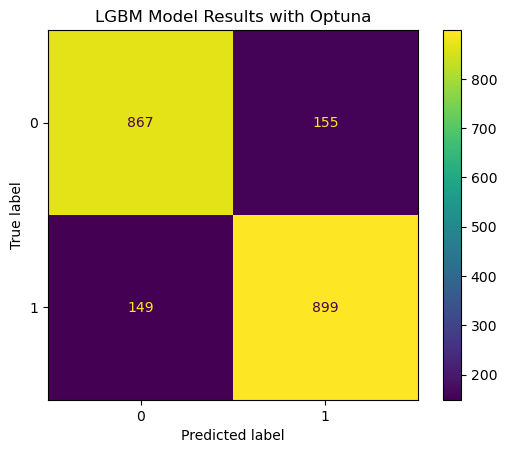

In [79]:
cm=confusion_matrix(y_test,y_pred,labels=optunaLGBM.classes_)
ConfusionMatrixDisplay(cm).plot();
plt.title("LGBM Model Results with Optuna");

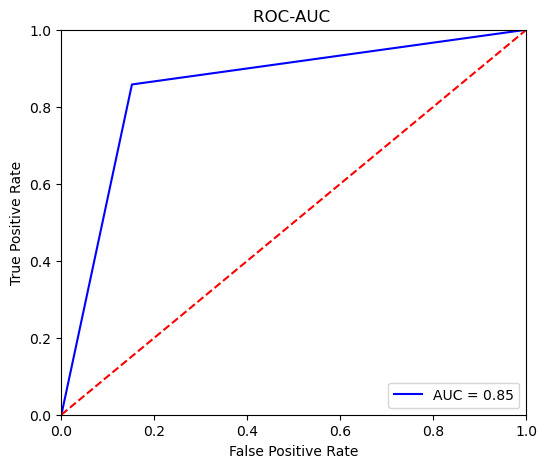

In [80]:
fpr, tpr, threshold =roc_curve(y_test, y_pred)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC ")
plt.show()

In [82]:
optuna.visualization.plot_optimization_history(study)

In [83]:
optuna.visualization.plot_slice(study)


In [84]:
optuna.visualization.plot_param_importances(study)

In [85]:
optuna.visualization.plot_rank(study)


## Classification with LSTM

- `LSTM` (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture that is frequently used in deep learning. Unlike traditional RNN's, LSTM's use a specialised structure to learn dependencies over long time intervals. One of the main advantages of LSTM's is their ability to learn long-term dependencies.

In [59]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load and preprocess your data
# X should contain your features, and y should be the binary churn labels (0 for no churn, 1 for churn).

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Standardize the features (scaling)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# LSTM model
model = keras.Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1), return_sequences=True,activation='tanh'))
model.add(LSTM(64))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
y_pred = (model.predict(X_test)>0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Epoch 1/10
259/259 [==============================] - 10s 21ms/step - loss: 0.5494 - accuracy: 0.7305 - val_loss: 0.5089 - val_accuracy: 0.7527
Epoch 2/10
259/259 [==============================] - 5s 18ms/step - loss: 0.4860 - accuracy: 0.7664 - val_loss: 0.4519 - val_accuracy: 0.7855
Epoch 3/10
259/259 [==============================] - 4s 16ms/step - loss: 0.4418 - accuracy: 0.7919 - val_loss: 0.4457 - val_accuracy: 0.7942
Epoch 4/10
259/259 [==============================] - 4s 17ms/step - loss: 0.4299 - accuracy: 0.8006 - val_loss: 0.4148 - val_accuracy: 0.8116
Epoch 5/10
259/259 [==============================] - 5s 18ms/step - loss: 0.4148 - accuracy: 0.8063 - val_loss: 0.4034 - val_accuracy: 0.8097
Epoch 6/10
259/259 [==============================] - 4s 17ms/step - loss: 0.4072 - accuracy: 0.8115 - val_loss: 0.3900 - val_accuracy: 0.8280
Epoch 7/10
259/259 [==============================] - 4s 17ms/step - loss: 0.4029 - accuracy: 0.8126 - val_loss: 0.3884 - val_accuracy: 0.821

In [60]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='Classification Results')
fig.show()

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.79      0.81      1022
           1       0.81      0.84      0.83      1048

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



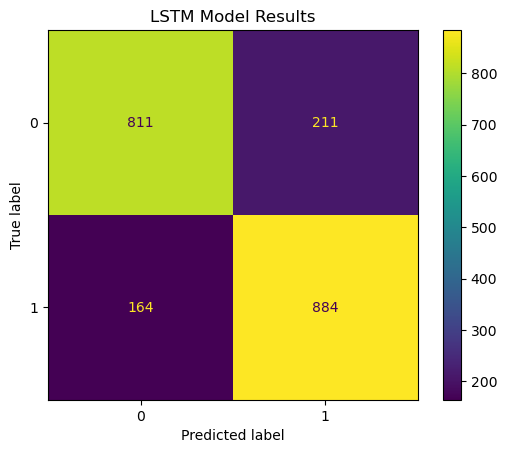

In [62]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot();
plt.title("LSTM Model Results");

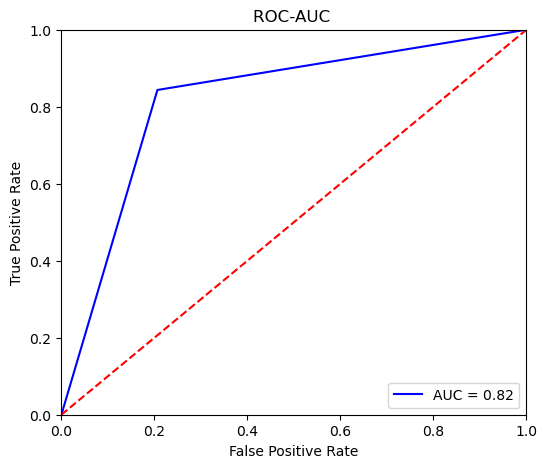

In [63]:
fpr, tpr, threshold =roc_curve(y_test, y_pred)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC ")
plt.show()

# Classification with CNN


- `CNN (Convolutional Neural Network)` is a neural network architecture widely used in deep learning, especially in image processing tasks. CNNs contain layers that automatically learn local connections and spatial hierarchies in images. Convolution layers, which are the basic building blocks, detect features in images and extract these features through filters. Pooling layers reduce the computational burden by reducing the size and summarise important information. Finally, fully connected layers perform classification using the extracted features.

In [64]:
# Örnek olarak, girdi verileri yeniden şekillendirme
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1, 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1, 1)

# CNN modeli oluşturma
model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 1), activation='relu', input_shape=(X_train.shape[1], 1, 1)))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Conv2D(64, kernel_size=(3, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 1)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Modeli derleme
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Modeli eğitme
model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Modeli değerlendirme
y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/10
259/259 [==============================] - 2s 5ms/step - loss: 0.4846 - accuracy: 0.7725 - val_loss: 0.4248 - val_accuracy: 0.8058
Epoch 2/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4289 - accuracy: 0.7998 - val_loss: 0.3998 - val_accuracy: 0.8169
Epoch 3/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4139 - accuracy: 0.8096 - val_loss: 0.4125 - val_accuracy: 0.8029
Epoch 4/10
259/259 [==============================] - 1s 4ms/step - loss: 0.4017 - accuracy: 0.8076 - val_loss: 0.4302 - val_accuracy: 0.8019
Epoch 5/10
259/259 [==============================] - 1s 4ms/step - loss: 0.3921 - accuracy: 0.8167 - val_loss: 0.3760 - val_accuracy: 0.8227
Epoch 6/10
259/259 [==============================] - 1s 4ms/step - loss: 0.3792 - accuracy: 0.8194 - val_loss: 0.3676 - val_accuracy: 0.8300
Epoch 7/10
259/259 [==============================] - 1s 4ms/step - loss: 0.3751 - accuracy: 0.8202 - val_loss: 0.3925 - val_accuracy: 0.8116
Epoch 

In [65]:
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='Classification Results')
fig.show()

In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      1022
           1       0.79      0.88      0.83      1048

    accuracy                           0.82      2070
   macro avg       0.82      0.82      0.82      2070
weighted avg       0.82      0.82      0.82      2070



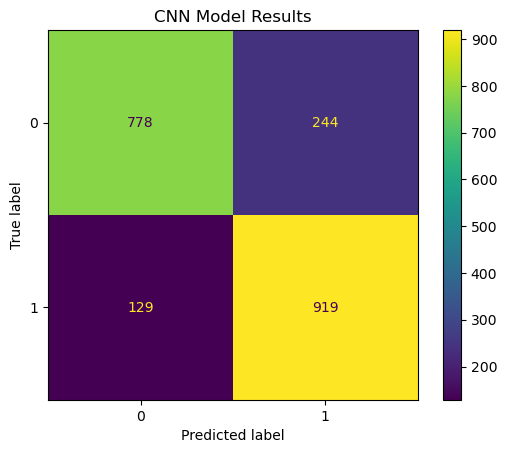

In [67]:
cm=confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(cm).plot();
plt.title("CNN Model Results");

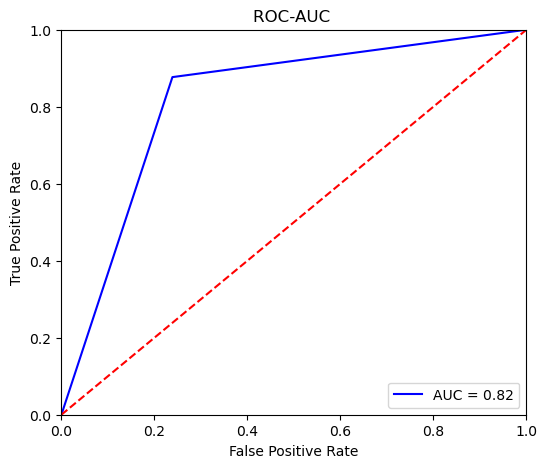

In [68]:
fpr, tpr, threshold =roc_curve(y_test, y_pred)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC ")
plt.show()

# Classification with DBN

- `DBN (Deep Belief Network)` is an artificial neural network architecture used in machine learning and deep learning. DBN's learn and model the properties of data using a multi-layered hierarchical structure. Each layer consists of a two-way probability graph model, such as a Hidden Markov Model or a Restricted Boltzmann Machine (RBM). DBN's build deep representations by learning data layer by layer and extracting more abstract features at each layer. This process is accomplished using a technique called "greedy" pre-training between layers. The first layer learns the basic features of the input data, while subsequent layers learn higher-level representations of these features.

In [69]:
#! pip install torch

In [70]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# RBM sınıfı oluşturma
class RBM(nn.Module):
    def __init__(self, visible_units, hidden_units):
        super(RBM, self).__init__()
        self.W = nn.Parameter(torch.randn(visible_units, hidden_units))
        self.v_bias = nn.Parameter(torch.randn(visible_units))
        self.h_bias = nn.Parameter(torch.randn(hidden_units))

    def forward(self, v):
        h = torch.sigmoid(torch.matmul(v, self.W) + self.h_bias)
        v_recon = torch.sigmoid(torch.matmul(h, self.W.t()) + self.v_bias)
        return v_recon, h


# RBM'leri oluşturma
rbm1 = RBM(visible_units=X_train.shape[1], hidden_units=64)
rbm2 = RBM(visible_units=64, hidden_units=64)

# RBM'leri eğitme
num_epochs = 10
batch_size = 32
learning_rate = 0.1

for epoch in range(num_epochs):
    for i in range(0, len(X_train), batch_size):
        batch_x = torch.tensor(X_train[i:i+batch_size], dtype=torch.float32)
        
        v_g1, h_g1 = rbm1(batch_x)
        rbm1_loss = torch.mean(torch.square(batch_x - v_g1))
        rbm1_optimizer = optim.SGD(rbm1.parameters(), lr=learning_rate)
        rbm1_optimizer.zero_grad()
        rbm1_loss.backward(retain_graph=True)
        rbm1_optimizer.step()
        
        v_g2, h_g2 = rbm2(h_g1)
        rbm2_loss = torch.mean(torch.square(h_g1 - h_g2))
        rbm2_optimizer = optim.SGD(rbm2.parameters(), lr=learning_rate)
        rbm2_optimizer.zero_grad()
        rbm2_loss.backward(retain_graph=True)
        rbm2_optimizer.step()

# DBN'yi oluşturma
class DBN(nn.Module):
    def __init__(self, rbm1, rbm2):
        super(DBN, self).__init__()
        self.rbm1 = rbm1
        self.rbm2 = rbm2
        self.fc = nn.Linear(64, 1)  # Çıkış boyutunu rbm2'nin gizli birim sayısına göre ayarlayın

    def forward(self, v):
        _, h1 = self.rbm1(v)
        _, h2 = self.rbm2(h1)
        out = self.fc(h2)  # Çıkışı lineer bir katman ile dönüştürün
        return torch.sigmoid(out)  # Sigmoid fonksiyonu ile sonuç döndürün

# DBN'yi oluşturma ve eğitme
dbn = DBN(rbm1, rbm2)
weight = torch.tensor([2.0])  # Örnek bir ağırlık değeri, gerçek değerleri kullanmalısınız
criterion = nn.BCELoss(weight=weight)
optimizer = optim.SGD(dbn.parameters(), lr=0.1)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)


y_train_array = y_train.values.astype(np.float32)
y_train_tensor = torch.tensor(y_train_array, dtype=torch.float32)


# Modeli eğitme
num_epochs = 10
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = dbn(X_train_tensor)
    loss = criterion(outputs.squeeze(), y_train_tensor)  # Sıkıştırılmış çıkışı kullanarak kaybı hesaplayın
    loss.backward()
    optimizer.step()

# Modelin değerlendirilmesi
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
outputs = dbn(X_test_tensor)
predicted = (outputs > 0.5).float()
accuracy = accuracy_score(y_test, predicted)
print("Accuracy:", accuracy)


Accuracy: 0.763768115942029


In [71]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.78      0.73      0.75      1022
           1       0.75      0.80      0.77      1048

    accuracy                           0.76      2070
   macro avg       0.77      0.76      0.76      2070
weighted avg       0.76      0.76      0.76      2070



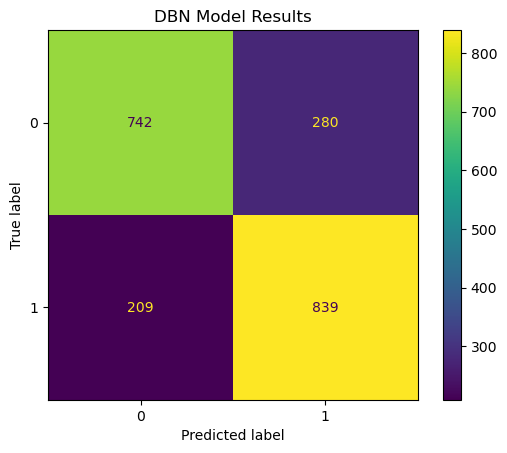

In [72]:
cm=confusion_matrix(y_test,predicted)
ConfusionMatrixDisplay(cm).plot();
plt.title("DBN Model Results");

In [73]:
f1 = f1_score(y_test, predicted)
precision = precision_score(y_test, predicted)
recall = recall_score(y_test, predicted)
accuracy = accuracy_score(y_test, predicted)

# Metrik değerlerini bir liste içinde sakla
scores = [f1, precision, recall, accuracy]
labels = ['F1 Score', 'Precision', 'Recall', 'Accuracy']

# Verileri bir DataFrame'e dönüştür
data = {'Metric': labels, 'Score': scores}
df = pd.DataFrame(data)

# Çubuk grafik kullanarak sonuçları görselleştir
fig = px.bar(df, x='Metric', y='Score', color='Metric', title='Classification Results')
fig.show()

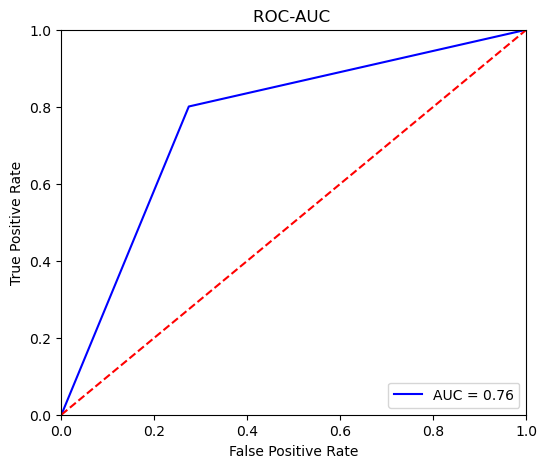

In [74]:
fpr, tpr, threshold =roc_curve(y_test, predicted)
roc_auc =auc(fpr, tpr)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title("ROC-AUC ")
plt.show()

### Conclusion 

 - In this study, machine learning and deep learning models for customer defection prediction are compared and their performances are discussed. While `LGBM` is the most successful model in machine learning, `CNN` is the most successful model in deep learning. The main difference in performance is the data set size. While deep learning models give higher results with high dimensional data, machine learning models can achieve better results with less data than these models.